In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data=pd.read_csv('/kaggle/input/crm-contacts/CRM-Contacts_clean.csv')
Data.head()

,Geburtsjahr,Owner,Einreisejahr,phone_net_income,receives_support_from_job_center,First_Visited_URL,basis_for_naturalization_check,Familienstand,Is_Record_Duplicate,job_qualification_ger,Rentenbeitraege,last_test,Number_Of_Chats,Ausbildungsbeginn,Average_Time_Spent_Minutes,phone_job_training_status,LAST_ACTION_TIME,phone_language_certificate,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Visitor_Score,Other_State,Last_Activity_Time,Kinder,Rente,phone_pension,availability,Other_City,utm_campaign,sales,phone_problems_with_immigration_authorities,Berufsausbildung_anerkannt,utm_source,net_income_second_check,pension_known,Arbeitsvertrag,temporary_right_of_residence_since,net_income,right_of_residence,utm_content,First_Visited_Time,valid_national_passport_(country_of_origin),Referrer,Grund_der_Absage,Mailing_State,Anzahl_Kinder_unter_25_Jahre,Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,language_certificate,already_applying_for_naturalization,id,phone_asylum_status,Created_Time,phone_language_certificate.1,phone_asylum_application_year,self_employed,tracking_referrer,Minijob,asylum_status,Email_Opt_Out,phone_temporary_right_of_residence_since,phone_already_applying_for_naturalization,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,last_call,Was_wollen_Sie,basis_for_naturalization,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,phone_asylum_decision_delivered,asylum_status.1,phone_valid_national_passport_(country_of_origin),Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,cancellation_date
0,NaN,318777000000639001,NaN,NaN,NaN,https://migrando.de/test/,NaN,NaN,False,NaN,NaN,NaN,0.0,NaN,8.66,NaN,2021-03-19T21:18:25+01:00,NaN,NaN,NaN,NaN,131.0,Nordrhein-westfalen,2023-08-31T15:51:09+02:00,NaN,NaN,NaN,NaN,Dusseldorf,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weniger als 1500€ netto,NaN,NaN,2020-12-23T11:32:19+01:00,NaN,https://www.youtube.com/,NaN,Nordrhein-westfalen,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,B1,NaN,318777000000366003,NaN,2020-12-23T11:35:14+01:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Flüchtlingseigenschaft,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2021-03-17
1,NaN,318777000000239001,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,24,NaN,NaN,NaN,NaN,NaN,2021-01-13T00:27:33+01:00,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-31T15:51:09+02:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2015,weniger als 1500€ netto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,C1,NaN,318777000000385001,NaN,2020-12-24T00:02:51+01:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,NaN
2,NaN,318777000000239001,NaN,2000,NaN,https://migrando.de/test/,NaN,NaN,False,NaN,48,NaN,0.0,NaN,17.54,NaN,2023-01-10T15:45:21+01:00,NaN,NaN,NaN,NaN,491.0,Baden-wurttemberg,2023-09-12T12:18:19+02:00,NaN,NaN,NaN,Ja,Heidelberg,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500€ bis 2500€ netto,NaN,NaN,2020-12-30T10:48:53+01:00,NaN,https://www.youtube.com/,NaN,Baden-wurttemberg,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,B1,NaN,318777000000435012,NaN,2021-01-04T11:45:34+01:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 Jahre - §10 Abs. 3 Satz 2,NaN,7.0,NaN,NaN,Subsidiärer Schutz,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,NaN
3,NaN,318777000000239001,2015,NaN,NaN,https://migrando.de/,NaN,NaN,False,Nein,48,2023-08-28T14:42:00+02:00,0.0,NaN,5.53,NaN,2023-09-06T01:18:23+02:00,NaN,NaN,NaN,Nein,135.0,NaN,2023-09-12T18:11:06+02:00,2.0,48 - 60 Monate,NaN,Ja,NaN,NaN,0,NaN,NaN,NaN,2500€ bis 3000€,NaN,NaN,2015,2500€ bis 3500€ netto,Befristetes Aufenthaltsrecht,NaN,2021-01-02T13:49:50+01:00,Ja,NaN,nie erreicht,NaN,NaN,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,B2,"Nein, ich habe noch keinen Antrag gestellt",

In [3]:
pd.set_option('display.max_rows', None)
Data.isna().sum()

Geburtsjahr                                          25824
Owner                                                    0
Einreisejahr                                         10669
phone_net_income                                     24968
receives_support_from_job_center                     26049
First_Visited_URL                                    10988
basis_for_naturalization_check                       42716
Familienstand                                        24646
Is_Record_Duplicate                                      0
job_qualification_ger                                30114
Rentenbeitraege                                      37277
last_test                                            22425
Number_Of_Chats                                      10890
Ausbildungsbeginn                                    41356
Average_Time_Spent_Minutes                           11515
phone_job_training_status                            36826
LAST_ACTION_TIME                                      76

In [4]:
Visitor = pd.DataFrame()
Visitor['Visitor_Score']=Data['Visitor_Score']
Visitor.head()

,Visitor_Score
0,131.0
1,NaN
2,491.0
3,135.0
4,NaN


# Removing the columns that are not relevant

In [5]:
# columns_to_drop = ["Geburtsjahr", "Owner", "First_Visited_URL","basis_for_naturalization_check","Familienstand","Is_Record_Duplicate"]
# Data=Data.drop(columns=columns_to_drop, axis=1)

In [6]:
# columns_to_drop = ["Rentenbeitraege","last_test","Number_Of_Chats","Ausbildungsbeginn","LAST_ACTION_TIME","Other_State","Visitor_Score",
#                   "net_income","pension_known","utm_source","utm_campaign","Other_City","Anzahl_Kinder_unter_25_Jahre","Mailing_State"]
# Data=Data.drop(columns=columns_to_drop, axis=1)

In [7]:
# columns_to_drop = ["Grund_der_Absage","Referrer","First_Visited_Time","utm_content","asylum_status","Minijob","tracking_referrer","self_employed",
#                   "phone_asylum_application_year","Created_Time","phone_asylum_status","id","phone_valid_national_passport_(country_of_origin)"]
# Data=Data.drop(columns=columns_to_drop, axis=1)

In [8]:
# columns_to_drop = ["asylum_status.1","phone_asylum_decision_delivered","last_call","phone_already_applying_for_naturalization","cancellation_date",
#                   "phone_language_certificate"]
# Data=Data.drop(columns=columns_to_drop, axis=1)
# Data.to_csv()
# Data

## Created New Data as Compressed Data

In [9]:
Data=pd.read_csv('/kaggle/input/compressed/compressedData.csv')
Data.drop(columns=['asylum_status.1','phone_net_income','phone_job_training_status','Last_Activity_Time',
                  'phone_pension','Berufsausbildung_anerkannt','temporary_right_of_residence_since',
                  'language_certificate','basis_for_naturalization'], axis=1,inplace=True)
Data.set_index(Data.columns[0], inplace=True)
Data.index.name = 'ID'
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,8.66,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,NaN,NaN,NaN,17.54,NaN,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,NaN,Nein,5.53,NaN,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Einreisejahr

In [10]:
print(Data['Einreisejahr'].unique())
print(Data['Einreisejahr'].isna().sum())

[nan '2015' '2012' '2016' '2014' '2013' '2011 oder davor' '2017' '2018'
 '2019' '2020' '2021' '2022' 'DFGKJDFS' '2011 or before' 'Vor 2014'
 'In Deutschland geboren']
10669


In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Replace non-numeric and special entries with NaN
Data['Einreisejahr'] = pd.to_numeric(Data['Einreisejahr'], errors='coerce')

# Impute missing values with the mode of valid years
imputer = SimpleImputer(strategy='most_frequent')
Data['Einreisejahr'] = imputer.fit_transform(Data['Einreisejahr'].values.reshape(-1, 1))

# If you want to round the imputed values to the nearest whole number (year)
Data['Einreisejahr'] = Data['Einreisejahr'].round().astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,NaN,NaN,8.66,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,NaN,NaN,17.54,NaN,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,NaN,Nein,5.53,NaN,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


In [12]:
print(Data['Einreisejahr'].unique())
print(Data['Einreisejahr'].isna().sum())
Data['Einreisejahr'].dtypes

[2015 2012 2016 2014 2013 2017 2018 2019 2020 2021 2022]
0


dtype('int64')

## Taking receives_support_from_job_center

In [13]:
print(Data['receives_support_from_job_center'].unique())
print(Data['receives_support_from_job_center'].isna().sum())

[nan 'Nein' 'Ja' 'Ich weiß es nicht']
26049


In [14]:
default_value = 'Ich weiß es nicht'  # Replace with your preferred default value
Data['receives_support_from_job_center'].fillna(default_value, inplace=True)


In [15]:
print(Data['receives_support_from_job_center'].unique())
print(Data['receives_support_from_job_center'].isna().sum())
Data['receives_support_from_job_center'].dtypes

['Ich weiß es nicht' 'Nein' 'Ja']
0


dtype('O')

In [16]:
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,Ich weiß es nicht,NaN,8.66,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,Ich weiß es nicht,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,Ich weiß es nicht,NaN,17.54,NaN,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,Ich weiß es nicht,Nein,5.53,NaN,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,Ich weiß es nicht,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


In [17]:
Data['receives_support_from_job_center'].dtypes

dtype('O')

### Handling Categorical Values

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Data['receives_support_from_job_center'] = le.fit_transform(Data['receives_support_from_job_center'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,NaN,8.66,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,NaN,17.54,NaN,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,Nein,5.53,NaN,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Job_Qualification_Ger

In [19]:
print(Data['job_qualification_ger'].unique())
print(Data['job_qualification_ger'].isna().sum())

[nan 'Nein' 'Ja']
30114


In [20]:
#Create a new category to explicitly represent missing values.
Data['job_qualification_ger'].fillna('Unknown', inplace=True)

In [21]:
print(Data['job_qualification_ger'].unique())
print(Data['job_qualification_ger'].isna().sum())
print(Data['job_qualification_ger'].dtypes)


['Unknown' 'Nein' 'Ja']
0
object


### Handling Categorical Values

In [22]:
Data['job_qualification_ger'] = le.fit_transform(Data['job_qualification_ger'])
Data['job_qualification_ger'] = Data['job_qualification_ger'].astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,NaN,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,NaN,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Average Time Spent 

In [23]:
print(Data['Average_Time_Spent_Minutes'].unique())
print(Data['Average_Time_Spent_Minutes'].isna().sum())
print(Data['Average_Time_Spent_Minutes'].dtypes)


[ 8.66   nan 17.54 ... 30.97 71.19 26.87]
11515
float64


In [24]:
Data['Average_Time_Spent_Minutes'].fillna(0, inplace=True)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,NaN,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,NaN,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Nationalit_t

In [25]:
print(Data['Nationalit_t'].unique())
print(Data['Nationalit_t'].isna().sum())
print(Data['Nationalit_t'].dtypes)


[nan 'Palästina' 'Afghanistan' 'Kamerun' 'Eritrea' 'Somalia' 'Marokko'
 'Irak' 'Syrien' 'Iran' 'Pakistan' 'Senegal' 'Togo' 'Jemen' 'Kosovo'
 'Sierra Leone' 'Äthiopien' 'Albanien' 'Birma (Myanmar)'
 'Bosnien-Herzegowina' 'Indien' 'Deutschland' 'Algerien'
 'Trinidad und Tobago' 'Bangladesch' 'Türkei' 'Guinea' 'Mazedonien'
 'Tunesien' 'Nigeria' 'Benin' 'Elfenbeinküste'
 'Vereinigte Staaten von Amerika (USA)' 'Armenien' 'Sudan' 'Gambia'
 'Serbien' 'Brasilien' 'Nepal' 'Montenegro' 'Niger' 'Tadschikistan'
 'Ghana' 'Kenia' 'Libanon' 'Georgia' 'Kolumbien' 'Liberia' 'Kanada'
 'Ägypten' 'Tansania' 'Libyen' 'Kongo' 'Jordanien' 'Honduras' 'Mali'
 'Burkina Faso' 'Philippinen' 'Kuba' 'Venezuela' 'Ukraine' 'Aserbaidschan'
 'Kroatien' 'Chile' 'Sri Lanka' 'Indonesien' 'China' 'Russland'
 'Südafrika' 'Guatemala' 'Israel' 'Usbekistan' 'Peru' 'Weißrussland'
 'Vereinigtes Königreich (Groß Britannien)' 'Kirgisistan'
 'Demokratische Republik Kongo' 'Saudi-Arabien' 'Angola' 'Südkorea'
 'Vietnam' 'Japan' 'Mong

In [26]:
default_nationality = 'Unknown'  # Replace with your preferred default value
Data['Nationalit_t'].fillna(default_nationality, inplace=True)

### Handling Categorical Values

In [27]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Nationalit_t' is the column you want to encode
le = LabelEncoder()
# Fit and transform the 'Class' column to numerical values
Data['Nationalit_t'] = le.fit_transform(Data['Nationalit_t'])
Data['Nationalit_t'] = Data['Nationalit_t'].astype(int)

# Display the mapping of original class names to numerical values
class_mapping_Nationality = dict(zip(le.classes_, le.transform(le.classes_).astype(int)))
Data.head()


,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,NaN,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,NaN,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking completed_job_training

In [28]:
print(Data['completed_job_training'].unique())
print(Data['completed_job_training'].isna().sum())
print(Data['completed_job_training'].dtypes)

[nan 'Ausbildung' 'Ungelernt' 'Studium']
30025
object


### Handling Missing and Categorical Values

In [29]:
Data['completed_job_training'].fillna('Not Specified', inplace=True)
Data['completed_job_training'] = le.fit_transform(Data['completed_job_training'])
Data['completed_job_training'] = Data['completed_job_training'].astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,NaN,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,Nein,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Deutscher_Ehepartner

In [30]:
print(Data['Deutscher_Ehepartner'].unique())
print(Data['Deutscher_Ehepartner'].isna().sum())
print(Data['Deutscher_Ehepartner'].dtypes)

[nan 'Nein' 'Ja']
27863
object


### Handling Missing values and Categorical Values

In [31]:
Data['Deutscher_Ehepartner'].fillna('Not Specified', inplace=True)
Data['Deutscher_Ehepartner'] = le.fit_transform(Data['Deutscher_Ehepartner'])
Data['Deutscher_Ehepartner'] = Data['Deutscher_Ehepartner'].astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,NaN,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2.0,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Kinder

In [32]:
print(Data['Kinder'].unique())
print(Data['Kinder'].isna().sum())
print(Data['Kinder'].dtypes)

[nan  2.  3.  0.  1.  4.  5.  6.  9. 10.  8.  7.]
10702
float64


## Handling the Missing values

In [33]:
# Calculate the rounded mean of the 'Kinder' column
rounded_mean_kinder = round(Data['Kinder'].mean())

# Impute missing values with the rounded mean
Data['Kinder'].fillna(rounded_mean_kinder, inplace=True)
Data['Kinder'] = Data['Kinder'].astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,NaN,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,48 - 60 Monate,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Rante

In [34]:
print(Data['Rente'].unique())
print(Data['Rente'].isna().sum())
print(Data['Rente'].dtypes)

[nan '48 - 60 Monate' '12 - 24 Monate' '0 - 12 Monate' '36 - 48 Monate'
 'Mehr als 60 Monate' '24 - 36 Monate' '1 bis 2 Jahre<br>12 - 24 Monate'
 '4 bis 5 Jahre<br>48 - 60 Monate']
10704
object


### Handling Missing Values and Categorical values

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute missing values with the most frequent category (mode)
imputer = SimpleImputer(strategy='most_frequent')
Data[['Rente']] = imputer.fit_transform(Data[['Rente']])

# Use LabelEncoder for encoding categorical values
label_encoder = LabelEncoder()
Data['Rente'] = label_encoder.fit_transform(Data['Rente'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,Ja,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,Ja,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Availability

In [36]:
print(Data['availability'].unique())
print(Data['availability'].isna().sum())
print(Data['availability'].dtypes)

[nan 'Ja']
25543
object


In [37]:
# Fill missing values with 0
Data['availability'].fillna(0, inplace=True)

# Encode 'Ja' as 1
Data['availability'] = Data['availability'].map({'Ja': 1, 0: 0})
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,NaN,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


In [38]:
print(Data['phone_problems_with_immigration_authorities'].unique())
print(Data['phone_problems_with_immigration_authorities'].isna().sum())
print(Data['phone_problems_with_immigration_authorities'].dtypes)

[nan 'Ich bekomme keinen Termin'
 'Ausländerbehörde behauptet: Voraussetzung liegen nicht vor'
 'Ich habe keinen Pass (Identität nicht geklärt)'
 'Nein, ich habe keine Probleme mit der Ausländerbehörde' 'Sonstiges'
 'Ausländerbehörde behauptet: Ich soll noch warten'
 'Ich habe keinen unbefristeten Arbeitsvertrag'
 'Ich verdiene zu wenig Geld' 'Rückmeldung BAMF']
35438
object


### Handling Missing Values and Categorical Values

In [39]:
# Fill NaN values with 'Kein Problem' (no problem)
Data['phone_problems_with_immigration_authorities'].fillna('Kein Problem', inplace=True)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,Kein Problem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,Kein Problem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,Kein Problem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,Kein Problem,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,Kein Problem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


In [40]:
# Use LabelEncoder for encoding categorical values
label_encoder = LabelEncoder()
Data['phone_problems_with_immigration_authorities'] = label_encoder.fit_transform(Data['phone_problems_with_immigration_authorities'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,2500€ bis 3000€,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


### Handling Missing and Categorical Values

In [41]:
print(Data['net_income_second_check'].unique())
print(Data['net_income_second_check'].isna().sum())
print(Data['net_income_second_check'].dtypes)

[nan '2500€ bis 3000€' '1500€ bis 2000€' '1000€ bis 1500€'
 '2000€ bis 2500€' '3000€ bis 3500€' 'Mehr als 3500€' '600€ bis 1000€'
 '0€ bis 600€' 'More than 3500€']
10702
object


In [42]:
# Impute missing values with the most frequent category (mode)
imputer = SimpleImputer(strategy='most_frequent')
Data[['net_income_second_check']] = imputer.fit_transform(Data[['net_income_second_check']])

# Use LabelEncoder for encoding categorical values
label_encoder = LabelEncoder()
Data['net_income_second_check'] = label_encoder.fit_transform(Data['net_income_second_check'])

In [43]:
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,NaN,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


In [44]:
print(Data['Arbeitsvertrag'].unique())
print(Data['Arbeitsvertrag'].isna().sum())
print(Data['Arbeitsvertrag'].dtypes)

[nan 'unbefristet' 'kein Arbeitsvertrag vorhanden' 'befristet'
 'selbstständig']
26160
object


### Handling Missing Values and Categorical Values

In [45]:
# Impute missing values with 'Not specified'
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['Arbeitsvertrag']] = imputer.fit_transform(Data[['Arbeitsvertrag']])

# Use LabelEncoder for encoding categorical values
label_encoder = LabelEncoder()
Data['Arbeitsvertrag']= label_encoder.fit_transform(Data['Arbeitsvertrag'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,Befristetes Aufenthaltsrecht,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


In [46]:
print(Data['right_of_residence'].unique())
print(Data['right_of_residence'].isna().sum())
print(Data['right_of_residence'].dtypes)

[nan 'Befristetes Aufenthaltsrecht' 'Unbefristetes Aufenthaltsrecht'
 'Ich weiß es nicht' 'Fiktionsbescheinigung' 'Duldung'
 'Temporary residence permit' 'ACHTUNG TEST 3.0!']
10700
object


### Handling Missing Values and Categorical Values

In [47]:
# Impute missing values with 'Unknown'
imputer = SimpleImputer(strategy='constant', fill_value='Not Specified')
Data[['right_of_residence']] = imputer.fit_transform(Data[['right_of_residence']])

# Use LabelEncoder for encoding categorical values
label_encoder = LabelEncoder()
Data['right_of_residence'] = label_encoder.fit_transform(Data['right_of_residence'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,NaN,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,NaN,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,NaN,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,Ja,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,NaN,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking valid_national_passport_(country_of_origin)

In [48]:
print(Data['valid_national_passport_(country_of_origin)'].unique())
print(Data['valid_national_passport_(country_of_origin)'].isna().sum())
print(Data['valid_national_passport_(country_of_origin)'].dtypes)

[nan 'Ja' 'Nein']
15128
object


### Handling Missing Values and Categorical Values

In [49]:
# Impute missing values with 'Unknown'
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
Data[['valid_national_passport_(country_of_origin)']] = imputer.fit_transform(Data[['valid_national_passport_(country_of_origin)']])

# Use LabelEncoder for encoding categorical values
label_encoder = LabelEncoder()
Data['valid_national_passport_(country_of_origin)'] = label_encoder.fit_transform(Data['valid_national_passport_(country_of_origin)'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),Test6,Test5,Test4,Test3,Test2,acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,NaN,2020-12-23,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,NaN,2020-12-24,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,NaN,NaN,NaN,NaN,2021-01-04,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,NaN,NaN,NaN,2023-08-28,2021-01-06,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,NaN,2021-01-06,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN


## Taking Tests 

In [50]:
print(Data[['Test2', 'Test3', 'Test4', 'Test5', 'Test6']].nunique())


Test2    876
Test3    508
Test4    331
Test5     74
Test6     46
dtype: int64


In [51]:
print(Data[['Test2', 'Test3', 'Test4', 'Test5', 'Test6']].isna().sum())

Test2    16565
Test3    38922
Test4    41898
Test5    42922
Test6    42960
dtype: int64


In [52]:
print(Data[['Test2', 'Test3', 'Test4', 'Test5', 'Test6']].dtypes)

Test2    object
Test3    object
Test4    object
Test5    object
Test6    object
dtype: object


### Creating a New Column

In [53]:
import numpy as np

# Create a new column "Highest_Test_Attempted"
Data['Highest_Test_Attempted'] = np.where(Data['Test6'].notna(), 6,
                            np.where(Data['Test5'].notna(), 5,
                            np.where(Data['Test4'].notna(), 4,
                            np.where(Data['Test3'].notna(), 3,
                            np.where(Data['Test2'].notna(), 2, 0)))))

# Drop the redundant test columns
Data.drop(['Test2', 'Test3', 'Test4', 'Test5', 'Test6'], axis=1, inplace=True)



# Display the updated DataFrame
Data.head(20)


,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2
5,2015,0,2,1.04,134,1,2,1,7,0,2,6,2,0,5,2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,2015,2,1,3.11,91,0,2,2,2,1,1,2,2,4,7,1,NaN,"Ja, mein Antrag wird aktuell bearbeitet",B2,False,2021,Nein,Asyl - § 25,NaN,NaN,Einbürgerung,Ledig,1.0,Ausbildung,Erreicht - Zusage,Nicht Erreicht,Erreicht - Zusage,Nicht Erreicht,Erreicht - kein Interesse,residence_permit,Erreicht - Zusage,Erreicht - Zusage,sonstiges (nicht vorbestraft),Ja,4
7,2015,0,2,0.00,134,1,2,1,7,1,0,6,2,0,5,2,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,Nicht Erreicht,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
8,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## Taking acquired_right_of_residence

In [54]:
print(Data['acquired_right_of_residence'].unique())
print(Data['acquired_right_of_residence'].isna().sum())
print(Data['acquired_right_of_residence'].dtypes)

[nan '2015' '2013' '2017' '2023' '2012' '2016' '2014' '2019' '2021'
 '2011 oder davor' '2022' '2018' '2011' '2020' 'Vor 2014']
21883
object


### Handling Missing Values and Categorical Values

In [55]:
# Replace '2011 oder davor' with a unique code, e.g., 2011
Data['acquired_right_of_residence'] = Data['acquired_right_of_residence'].replace('2011 oder davor', 2011)

# Replace 'Vor 2014' with another unique code, e.g., 2013
Data['acquired_right_of_residence'] = Data['acquired_right_of_residence'].replace('Vor 2014', 2013)

# Convert the column to numeric, treating errors as NaN
Data['acquired_right_of_residence'] = pd.to_numeric(Data['acquired_right_of_residence'], errors='coerce')
# Replace NaN values with the mean of the column
Data['acquired_right_of_residence'] = Data['acquired_right_of_residence'].fillna(Data['acquired_right_of_residence'].median()).astype(int)


Data.head()


,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,"Nein, ich habe noch keinen Antrag gestellt",B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking already_applying_for_naturalization

In [56]:
print(Data['already_applying_for_naturalization'].unique())
print(Data['already_applying_for_naturalization'].isna().sum())
print(Data['already_applying_for_naturalization'].dtypes)

[nan 'Nein, ich habe noch keinen Antrag gestellt'
 'Ja, mein Antrag wird aktuell bearbeitet' 'Ich weiß es nicht'
 'Ja, aber mein Antrag wurde abgelehnt'
 'No, I have not submitted an application yet']
10721
object


### Handling Missing Values and Categorical Values

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
Data['already_applying_for_naturalization'] = Data['already_applying_for_naturalization'].fillna('Not Specified')

# Apply label encoding
le = LabelEncoder()
Data['already_applying_for_naturalization'] = le.fit_transform(Data['already_applying_for_naturalization'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,B2,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking phone_language_certificate

In [58]:
print(Data['phone_language_certificate.1'].unique())
print(Data['phone_language_certificate.1'].isna().sum())
print(Data['phone_language_certificate.1'].dtypes)

[nan 'B2' 'B1' 'Nein' 'C1' 'A1' 'A2' 'C2']
10708
object


### Handling Missing Values and Categorical Values

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
Data['phone_language_certificate.1'] = Data['phone_language_certificate.1'].fillna('Not Specified')

# Apply label encoding
le = LabelEncoder()
Data['phone_language_certificate.1'] = le.fit_transform(Data['phone_language_certificate.1'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,False,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking Email opt out

In [60]:
print(Data['Email_Opt_Out'].unique())
print(Data['Email_Opt_Out'].isna().sum())
print(Data['Email_Opt_Out'].dtypes)

[False  True]
0
bool


### Handling Missing Values and Categorical Values

In [61]:
Data['Email_Opt_Out'] = Data['Email_Opt_Out'].astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,NaN,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking phone_temporary_right_of_residence_since

In [62]:
print(Data['phone_temporary_right_of_residence_since'].unique())
print(Data['phone_temporary_right_of_residence_since'].isna().sum())
print(Data['phone_temporary_right_of_residence_since'].dtypes)

[nan '2021' '2022' '2020' '2023' '2019' '2015' '2018' 'vor 2015' '2016'
 '2017']
30925
object


In [63]:

# Replace 'Vor 2014' with another unique code, e.g., 
Data['phone_temporary_right_of_residence_since'] = Data['phone_temporary_right_of_residence_since'].replace('Vor 2015', 2014)

# Convert the column to numeric, treating errors as NaN
Data['phone_temporary_right_of_residence_since'] = pd.to_numeric(Data['phone_temporary_right_of_residence_since'], errors='coerce')
# Replace NaN values with the mean of the column
Data['phone_temporary_right_of_residence_since'] = Data['phone_temporary_right_of_residence_since'].fillna(Data['phone_temporary_right_of_residence_since'].median()).astype(int)


Data.head()


,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,Nein,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking receives_support_from_job_center_check

In [64]:
print(Data['receives_support_from_job_center_check'].unique())
print(Data['receives_support_from_job_center_check'].isna().sum())
print(Data['receives_support_from_job_center_check'].dtypes)

[nan 'Nein' 'Ich weiß es nicht' 'Ja']
14161
object


In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['receives_support_from_job_center_check']] = imputer.fit_transform(Data[['receives_support_from_job_center_check']])

# Apply label encoding
le = LabelEncoder()
Data['receives_support_from_job_center_check'] = le.fit_transform(Data['receives_support_from_job_center_check'])
Data['receives_support_from_job_center_check'] = Data['receives_support_from_job_center_check'].astype(int)
class_mapping_Job_Centre = dict(zip(le.classes_, le.transform(le.classes_).astype(int)))
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,NaN,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking residence_permit

In [66]:
print(Data['residence_permit'].unique())
print(Data['residence_permit'].isna().sum())
print(Data['residence_permit'].dtypes)

[nan 'Asyl - § 25' 'sonstiges' 'EU-Freizügigkeit'
 'Niederlassungserlaubnis' 'Fachkraft - § 18 ff.'
 'Ausbildungszweck - § 16 ff' 'Blaue Karte - § 18 Abs. 2' '§§25a-26'
 'Selbstständig - § 21' 'Familiennachzug - § 27 ff' '§22-24' '§§27-36a'
 'ich weiß es nicht']
24295
object


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['residence_permit']] = imputer.fit_transform(Data[['residence_permit']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['residence_permit'] = label_encoder.fit_transform(Data['residence_permit'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,NaN,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking Integrationsnachweis

In [68]:
print(Data['Integrationsnachweis'].unique())
print(Data['Integrationsnachweis'].isna().sum())
print(Data['Integrationsnachweis'].dtypes)

[nan 'Deutscher Schulabschluss'
 'Test - Leben in Deutschland bzw. Einbürgerungstest'
 'Test - Leben in Deutschland bzw. Einbürgerungstest wird nachgeholt'
 'Deutscher Studienabschluss (kulturell oder politisch)'
 'Deutscher Ausbildungsabschluss' 'Integrationskurs (Mindestdauer: 100h)']
31382
object


In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['Integrationsnachweis']] = imputer.fit_transform(Data[['Integrationsnachweis']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['Integrationsnachweis'] = label_encoder.fit_transform(Data['Integrationsnachweis'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,"Nein, ich habe noch keinen Antrag gestellt",Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking application_permanent_right_of_residence

In [70]:
print(Data['application_permanent_right_of_residence'].unique())
print(Data['application_permanent_right_of_residence'].isna().sum())
print(Data['application_permanent_right_of_residence'].dtypes)

[nan 'Nein, ich habe noch keinen Antrag gestellt'
 'Ja, aber mein Antrag wurde abgelehnt'
 'Ja, mein Antrag wird aktuell bearbeitet' 'Ich weiß es nicht'
 'No, I have not submitted an application yet']
21884
object


In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['application_permanent_right_of_residence']] = imputer.fit_transform(Data[['application_permanent_right_of_residence']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['application_permanent_right_of_residence'] = label_encoder.fit_transform(Data['application_permanent_right_of_residence'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,Einbürgerung,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking Was_wollen_Sie

In [72]:
print(Data['Was_wollen_Sie'].unique())
print(Data['Was_wollen_Sie'].isna().sum())
print(Data['Was_wollen_Sie'].dtypes)

[nan 'Einbürgerung' 'Unbefristetes Aufenthaltsrecht' 'Sonstiges'
 'Befristetes Aufenthaltsrecht' 'Familiennachzug'
 'Temporary residence permit (Befristetes Aufenthaltsrecht)']
10830
object


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['Was_wollen_Sie']] = imputer.fit_transform(Data[['Was_wollen_Sie']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['Was_wollen_Sie'] = label_encoder.fit_transform(Data['Was_wollen_Sie'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,NaN,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,Verheiratet,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking Wie_ist_ihr_aktueller_Familienstand

In [74]:
print(Data['Wie_ist_ihr_aktueller_Familienstand'].unique())
print(Data['Wie_ist_ihr_aktueller_Familienstand'].isna().sum())
print(Data['Wie_ist_ihr_aktueller_Familienstand'].dtypes)

[nan 'Verheiratet' 'Ledig' 'Geschieden' 'Verwitwet' 'Single']
10699
object


In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['Wie_ist_ihr_aktueller_Familienstand']] = imputer.fit_transform(Data[['Wie_ist_ihr_aktueller_Familienstand']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['Wie_ist_ihr_aktueller_Familienstand'] = label_encoder.fit_transform(Data['Wie_ist_ihr_aktueller_Familienstand'])
# Display the mapping of original class names to numerical values
class_mapping_Family_Status = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3.0,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7.0,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1.0,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking Days_Visited

In [76]:
print(Data['Days_Visited'].unique())
print(Data['Days_Visited'].isna().sum())
print(Data['Days_Visited'].dtypes)

[  3.  nan   7.   1.   2. 155.   4.   8.   6.   5.   9. 181.  12.  26.
  25.  19.  27.  11.  14.  13.  10.  20.  15.  23.  79.  24.  37.  40.
  58.  17.  16. 182.  28. 113. 179.  51.  18.  55.  46.  22.  35.  89.
  32.  52.  41.  66. 139.  61.  76.  31.  21.  87. 107. 106.  38.  81.
 160. 144. 157. 197. 169. 175. 210. 199. 201.  45.  39.  34. 234.  47.
 114.  30.  36.  33.  80.  65.  49.  99.  29. 166. 103. 118. 123.  86.
 132.  97. 136.  90.  62.  59.  64.  53.  95.  75.  78.  83.  71.  60.
 180.  73.  82.  42.  69.  92.  67.  85.  88. 119. 112. 134. 147.  44.
  68.  96. 101. 191. 109. 111. 120. 125.  98. 108. 131.  56. 135. 143.
 148.  43.  93.  77.  48.  63.  50. 178.  72.  57. 186. 194.]
10890
float64


In [77]:
# Fill missing values with 0
Data['Days_Visited'] = Data['Days_Visited'].fillna(0)

# Convert the column to integer type
Data['Days_Visited'] = Data['Days_Visited'].astype(int)
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3,NaN,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7,NaN,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1,Studium,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking graduation

In [78]:
print(Data['graduation'].unique())
print(Data['graduation'].isna().sum())
print(Data['graduation'].dtypes)

[nan 'Studium' 'Ausbildung' 'Nein' '10. Klasse Abschluss'
 'Abitur oder Fachabitur' '10th grade graduation (10. Klasse)'
 '9. Klasse Abschluss']
10701
object


In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['graduation']] = imputer.fit_transform(Data[['graduation']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['graduation'] = label_encoder.fit_transform(Data['graduation'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3,6,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,NaN,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7,6,NaN,NaN,NaN,NaN,Erreicht - Zusage,NaN,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1,7,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,residence_permit_and_settlement_permit,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,NaN,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking requirements_fulfilled_for

In [80]:
print(Data['requirements_fulfilled_for'].unique())
print(Data['requirements_fulfilled_for'].isna().sum())
print(Data['requirements_fulfilled_for'].dtypes)

[nan 'residence_permit_and_settlement_permit' 'residence_permit'
 'settlement_permit' 'NONE']
10711
object


In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['requirements_fulfilled_for']] = imputer.fit_transform(Data[['requirements_fulfilled_for']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['requirements_fulfilled_for'] = label_encoder.fit_transform(Data['requirements_fulfilled_for'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3,6,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,1,Nicht Erreicht,Erreicht - Unsicher,NaN,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,1,NaN,Erreicht - kein Anspruch,NaN,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7,6,NaN,NaN,NaN,NaN,Erreicht - Zusage,1,Nicht Erreicht,Nicht Erreicht,NaN,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1,7,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,3,Nicht Erreicht,Nicht Erreicht,NaN,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,1,Erreicht - kein Interesse,Nicht Erreicht,NaN,NaN,2


## Taking Vorstrafe

In [82]:
print(Data['Vorstrafe'].unique())
print(Data['Vorstrafe'].isna().sum())
print(Data['Vorstrafe'].dtypes)

[nan 'sonstiges (nicht vorbestraft)' 'keine Straftaten' 'Bewährungsstrafe'
 'sonstiges (möglicherweise vorbestraft)' 'mehr als 90 Tagessätze'
 'Freiheitsstrafe' 'offenes Strafverfahren']
24337
object


In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='Not specified')
Data[['Vorstrafe']] = imputer.fit_transform(Data[['Vorstrafe']])

# Apply label encoding
label_encoder = LabelEncoder()
Data['Vorstrafe'] = label_encoder.fit_transform(Data['Vorstrafe'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3,6,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,1,Nicht Erreicht,Erreicht - Unsicher,2,NaN,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,1,NaN,Erreicht - kein Anspruch,2,NaN,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7,6,NaN,NaN,NaN,NaN,Erreicht - Zusage,1,Nicht Erreicht,Nicht Erreicht,2,NaN,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1,7,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,3,Nicht Erreicht,Nicht Erreicht,2,Ja,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,1,Erreicht - kein Interesse,Nicht Erreicht,2,NaN,2


## Taking Integrationstest

In [84]:
print(Data['Integrationstest'].unique())
print(Data['Integrationstest'].isna().sum())
print(Data['Integrationstest'].dtypes)

[nan 'Ja' 'Ich weiß es nicht' 'Nein' 'Yes']
10708
object


In [85]:
# Replace 'Yes' with 'Ja'
Data['Integrationstest'] = Data['Integrationstest'].replace('Yes', 'Ja')

# Handle missing values as 'not specified'
Data['Integrationstest'] = Data['Integrationstest'].fillna('not specified')

# Use LabelEncoder for encoding categorical values
le = LabelEncoder()
Data['Integrationstest'] = le.fit_transform(Data['Integrationstest'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,Anruf_7,Anruf_6,Anruf_5,Anruf_4,Anruf_3,requirements_fulfilled_for,Anruf_2,Anruf_1,Vorstrafe,Integrationstest,Highest_Test_Attempted
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3,6,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,1,Nicht Erreicht,Erreicht - Unsicher,2,3,2
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,1,NaN,Erreicht - kein Anspruch,2,3,2
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7,6,NaN,NaN,NaN,NaN,Erreicht - Zusage,1,Nicht Erreicht,Nicht Erreicht,2,3,2
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1,7,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,3,Nicht Erreicht,Nicht Erreicht,2,1,3
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,NaN,NaN,NaN,NaN,NaN,1,Erreicht - kein Interesse,Nicht Erreicht,2,3,2


In [86]:
# Check unique values
unique_values = Data[['Anruf_1', 'Anruf_2', 'Anruf_3', 'Anruf_4', 'Anruf_5', 'Anruf_6', 'Anruf_7']].apply(lambda x: x.unique())

# Count missing values
missing_values = Data[['Anruf_1', 'Anruf_2', 'Anruf_3', 'Anruf_4', 'Anruf_5', 'Anruf_6', 'Anruf_7']].isna().sum()

# Check data types
data_types = Data[['Anruf_1', 'Anruf_2', 'Anruf_3', 'Anruf_4', 'Anruf_5', 'Anruf_6', 'Anruf_7']].dtypes


In [87]:
unique_values

,Anruf_1,Anruf_2,Anruf_3,Anruf_4,Anruf_5,Anruf_6,Anruf_7
0,Erreicht - Unsicher,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht,NaN,NaN,NaN
1,Erreicht - kein Anspruch,NaN,NaN,NaN,Nicht Erreicht,Nicht Erreicht,Nicht Erreicht
2,Nicht Erreicht,Erreicht - kein Interesse,Erreicht - Zusage,Erreicht - kein Anspruch,Erreicht - Zusage,Erreicht - unsicher,Erreicht - Zusage
3,NaN,Erreicht - Zusage,Erreicht - kein Interesse,Erreicht - Zusage,Erreicht - unsicher,Erreicht - kein Anspruch,Erreicht - kein Interesse
4,Erreicht - Zusage,Erreicht - kein Anspruch,Nicht Erreicht - falsche Telefonnummer,Erreicht - kein Interesse,Erreicht - kein Interesse,Erreicht - kein Interesse,Nicht Erreicht - falsche Telefonnummer
5,Erreicht - kein Interesse,Nicht Erreicht - falsche Telefonnummer,Erreicht - Anwalt sprechen,Erreicht - Anwalt sprechen,Erreicht - keine Zeit,Erreicht - Zusage,Erreicht - unsicher
6,Erreicht - keine Zeit,Erreicht - unsicher,Erreicht - unsicher,Erreicht - unsicher,Erreicht - kein Anspruch,Erreicht - Anwalt sprechen,Erreicht - kein Anspruch
7,Erreicht - Anwalt sprechen,Erreicht - Anwalt sprechen,Erreicht - kein Anspruch,Nicht Erreicht - falsche Telefonnummer,Nicht Erreicht - falsche Telefonnummer,Nicht Erreicht - falsche Telefonnummer,Erreicht - keine Zeit
8,Nicht Erreicht - falsche Telefonnummer,Erreicht - keine Zeit,Erreicht - keine Zeit,Erreicht - keine Zeit,Erreicht - Anwalt sprechen,Erreicht - keine Zeit,Erreicht - Anwalt sprechen


In [88]:
missing_values,data_types

(Anruf_1    16844
 Anruf_2    27730
 Anruf_3    33810
 Anruf_4    37233
 Anruf_5    40106
 Anruf_6    41521
 Anruf_7    42334
 dtype: int64,
 Anruf_1    object
 Anruf_2    object
 Anruf_3    object
 Anruf_4    object
 Anruf_5    object
 Anruf_6    object
 Anruf_7    object
 dtype: object)

In [89]:
# Create a new column "Highest_Attempt_Outcome"
Data['Highest_Attempt_Outcome'] = Data[['Anruf_1', 'Anruf_2', 'Anruf_3', 'Anruf_4', 'Anruf_5', 'Anruf_6', 'Anruf_7']].apply(lambda row: next((attempt for attempt in row if pd.notna(attempt)), None), axis=1)

# Drop the redundant attempt columns
Data.drop(['Anruf_1', 'Anruf_2', 'Anruf_3', 'Anruf_4', 'Anruf_5', 'Anruf_6', 'Anruf_7'], axis=1, inplace=True)
Data['Highest_Attempt_Outcome'] = le.fit_transform(Data['Highest_Attempt_Outcome'])
Data.head()

,Einreisejahr,receives_support_from_job_center,job_qualification_ger,Average_Time_Spent_Minutes,Nationalit_t,completed_job_training,Deutscher_Ehepartner,Kinder,Rente,availability,sales,phone_problems_with_immigration_authorities,net_income_second_check,Arbeitsvertrag,right_of_residence,valid_national_passport_(country_of_origin),acquired_right_of_residence,already_applying_for_naturalization,phone_language_certificate.1,Email_Opt_Out,phone_temporary_right_of_residence_since,receives_support_from_job_center_check,residence_permit,Integrationsnachweis,application_permanent_right_of_residence,Was_wollen_Sie,Wie_ist_ihr_aktueller_Familienstand,Days_Visited,graduation,requirements_fulfilled_for,Vorstrafe,Integrationstest,Highest_Test_Attempted,Highest_Attempt_Outcome
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015,0,2,8.66,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,3,6,1,2,3,2,0
1,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,1,2,3,2,3
2,2015,0,2,17.54,134,1,2,1,7,1,2,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,7,6,1,2,3,2,7
3,2015,0,1,5.53,134,1,1,2,6,1,0,6,4,0,1,0,2015,3,3,0,2021,2,7,4,3,1,4,1,7,3,2,1,3,7
4,2015,0,2,0.00,134,1,2,1,7,0,0,6,2,0,5,2,2017,5,7,0,2021,3,7,4,5,3,2,0,6,1,2,3,2,7


# Visulization

In [90]:
class_mapping_Nationality.keys()

dict_keys(['Afghanistan', 'Alandinseln', 'Albanien', 'Algerien', 'Amerikanisch-Samoa', 'Angola', 'Argentinien', 'Armenien', 'Aserbaidschan', 'Australien', 'Bangladesch', 'Belgien', 'Benin', 'Bhutan', 'Birma (Myanmar)', 'Bolivien', 'Bosnien-Herzegowina', 'Brasilien', 'Bulgarien', 'Burkina Faso', 'Burundi', 'Chile', 'China', 'Demokratische Republik Kongo', 'Deutschland', 'Dominikanische Republik', 'Dänemark', 'Ecuador', 'El Salvador', 'Elfenbeinküste', 'Eritrea', 'Frankreich', 'Gabun', 'Gambia', 'Georgia', 'Ghana', 'Griechenland', 'Guatemala', 'Guinea', 'GuineaBissau', 'Guyana', 'Haiti', 'Honduras', 'Hongkong', 'Indien', 'Indonesien', 'Irak', 'Iran', 'Israel', 'Italien', 'Jamaika', 'Japan', 'Jemen', 'Jordanien', 'Kamerun', 'Kanada', 'Kasachstan', 'Kenia', 'Kirgisistan', 'Kolumbien', 'Kongo', 'Kosovo', 'Kroatien', 'Kuba', 'Kuwait', 'Lettland', 'Libanon', 'Liberia', 'Libyen', 'Litauen', 'Luxemburg', 'Madagaskar', 'Malaysia', 'Mali', 'Marokko', 'Mauretanien', 'Mauritius', 'Mazedonien', 'Mex

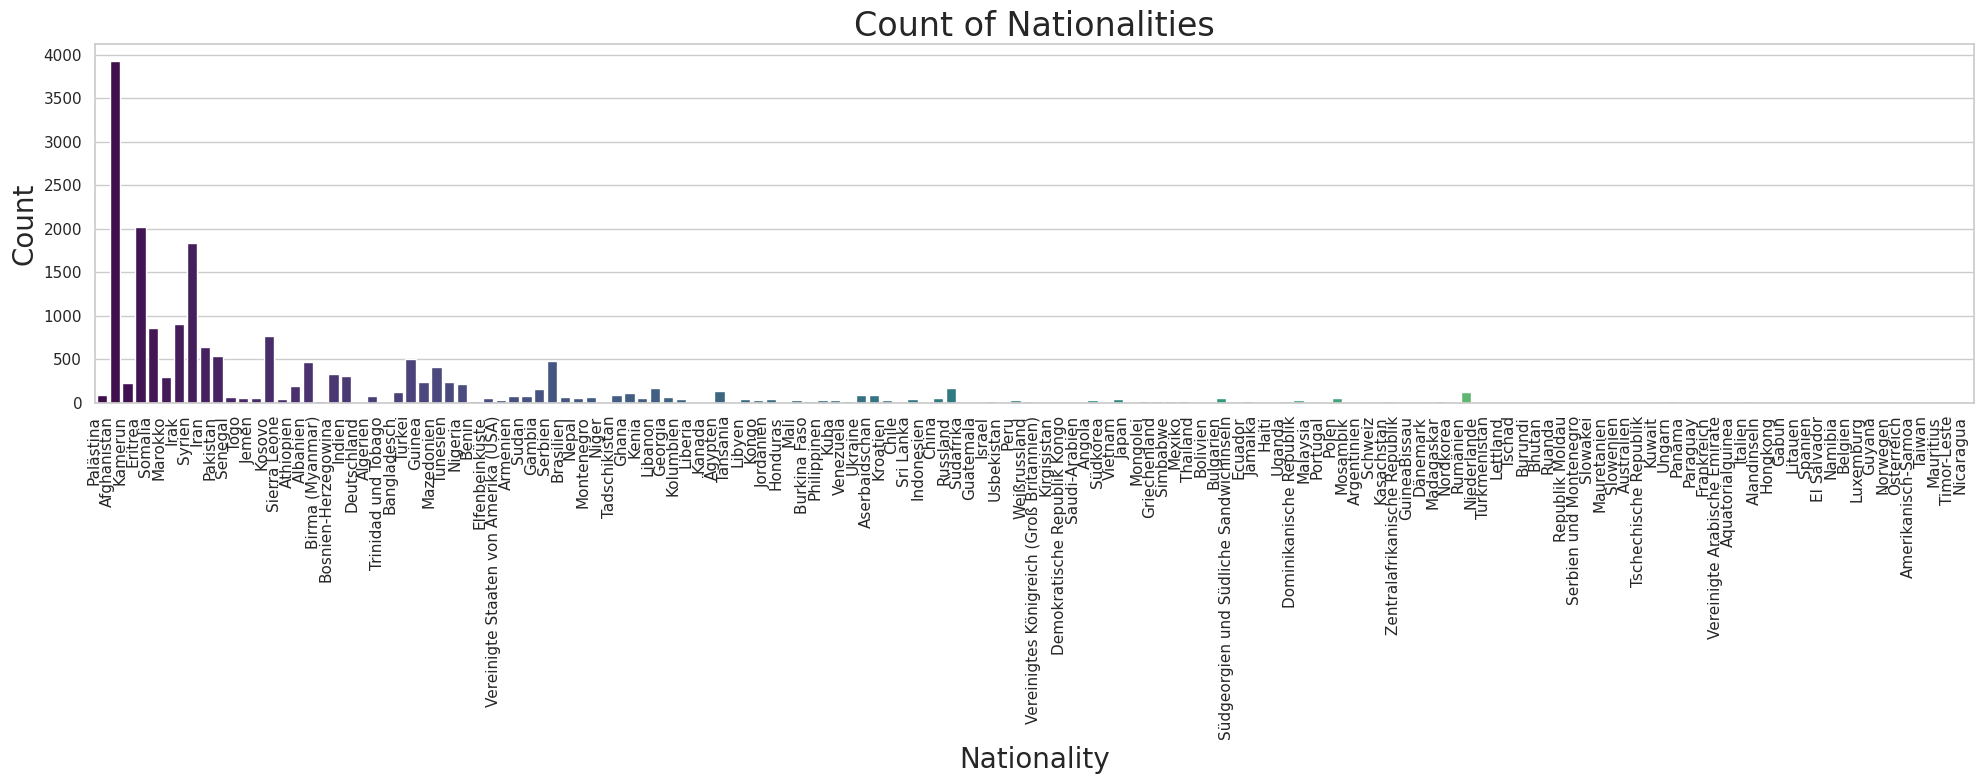

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style of seaborn
sns.set(style="whitegrid")
temp_Data=pd.DataFrame()

# Replace encoded labels with actual country names
Data['Nationality'] = Data['Nationalit_t'].replace(class_mapping_Nationality.values(),class_mapping_Nationality.keys())
temp_Data = Data[Data['Nationality'] != 'Unknown']

# Visualization 3: Countplot for 'Nationalit_t' with actual country names
plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
ax = sns.countplot(x='Nationality', data=temp_Data, palette='viridis')
plt.title('Count of Nationalities', fontsize=24)
plt.xlabel('Nationality', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Drop the 'Nationalit_t' column
Data = Data.drop('Nationality', axis=1)



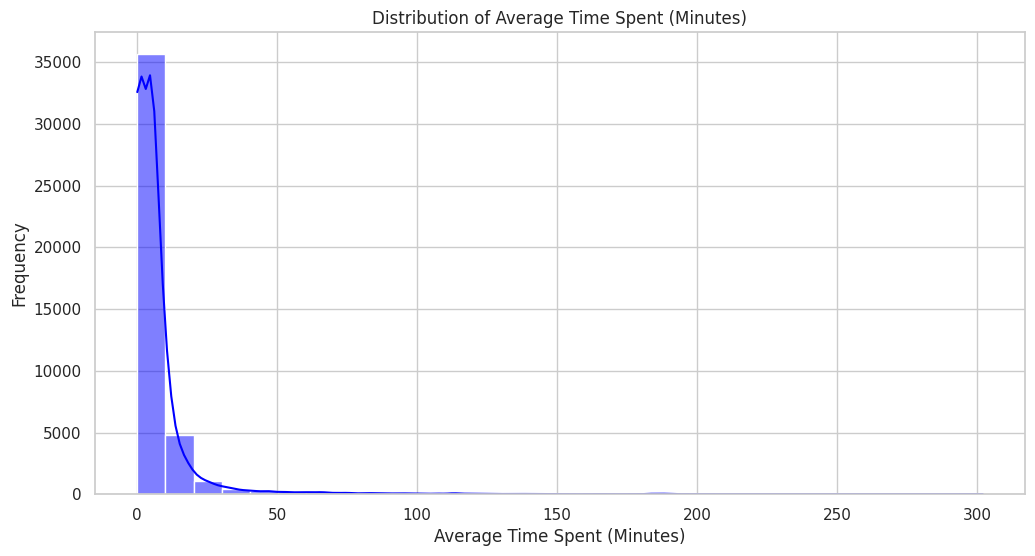

In [92]:
# Visualization 1: Distribution of 'Average_Time_Spent_Minutes'
plt.figure(figsize=(12, 6))
sns.histplot(Data['Average_Time_Spent_Minutes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Time Spent (Minutes)')
plt.xlabel('Average Time Spent (Minutes)')
plt.ylabel('Frequency')
plt.show()

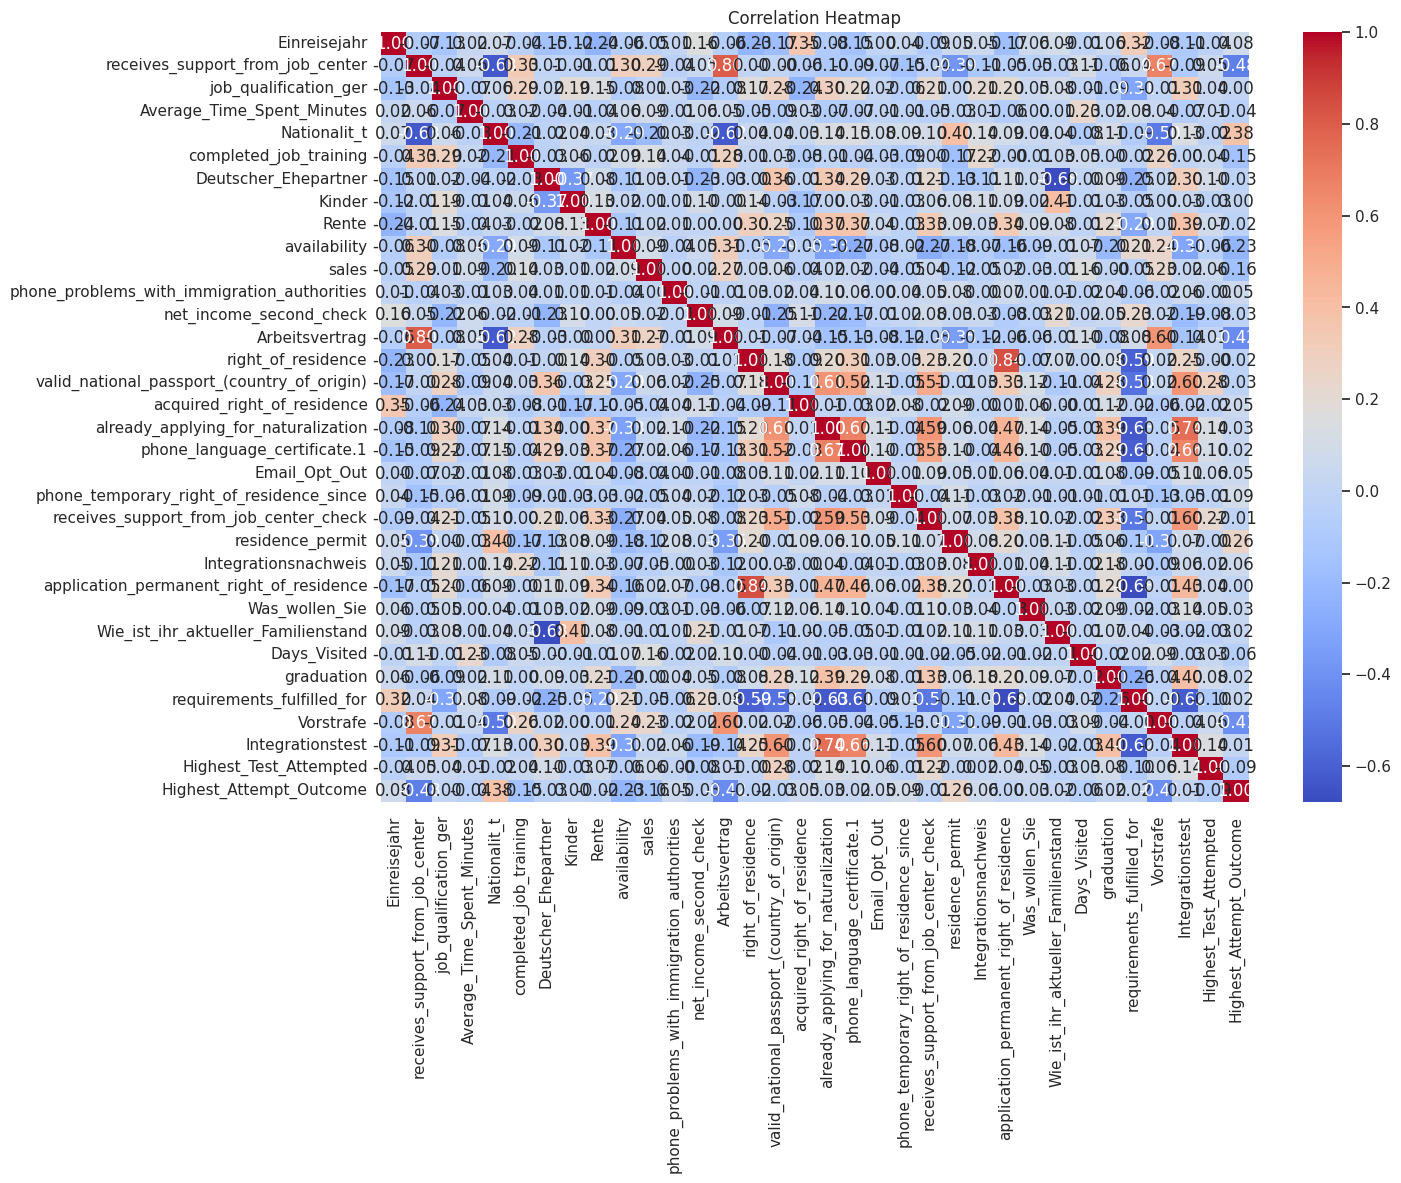

In [93]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(Data.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1600x1200 with 0 Axes>

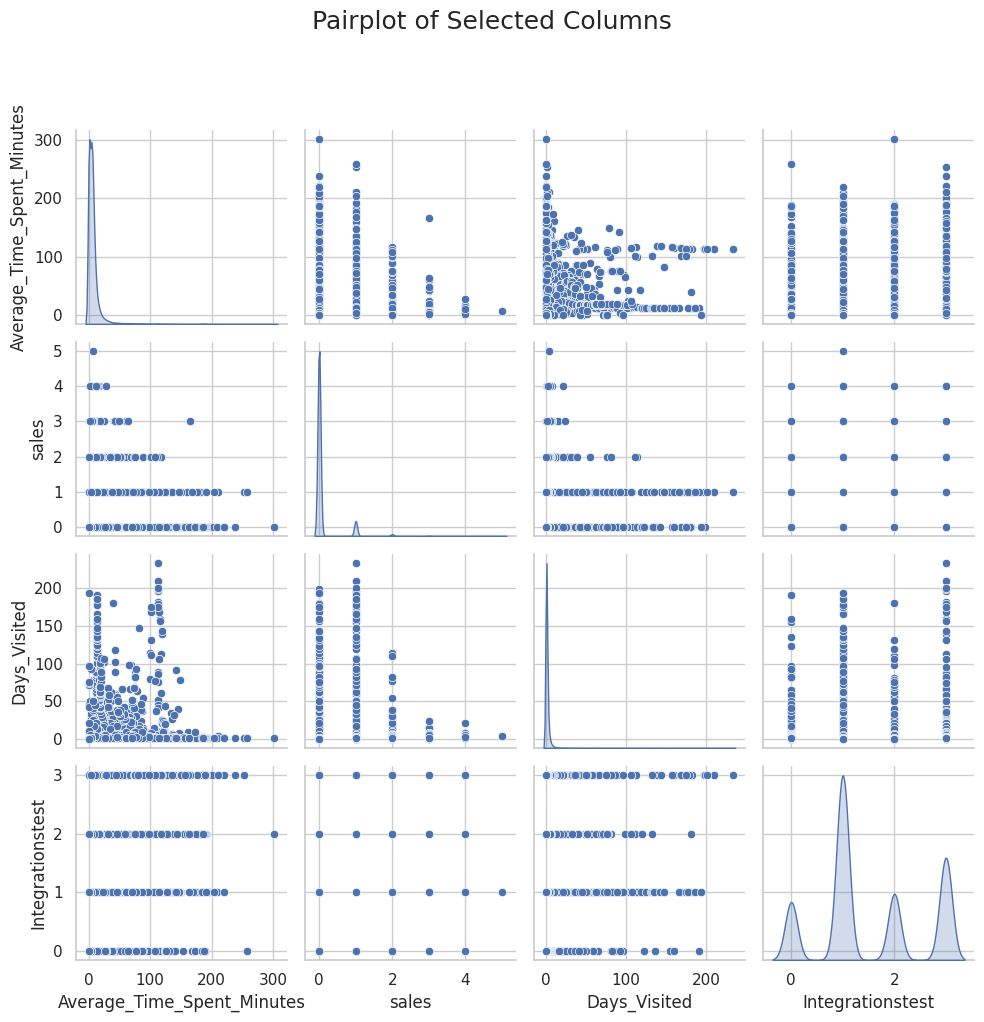

In [94]:
# Visualization 4: Pairplot for selected columns
selected_columns = ['Average_Time_Spent_Minutes', 'sales', 'Days_Visited', 'Integrationstest']
plt.figure(figsize=(16, 12))
pairplot = sns.pairplot(Data[selected_columns], diag_kind='kde', height=2.5)
pairplot.fig.suptitle('Pairplot of Selected Columns', y=1.02, fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap with suptitle
plt.show()


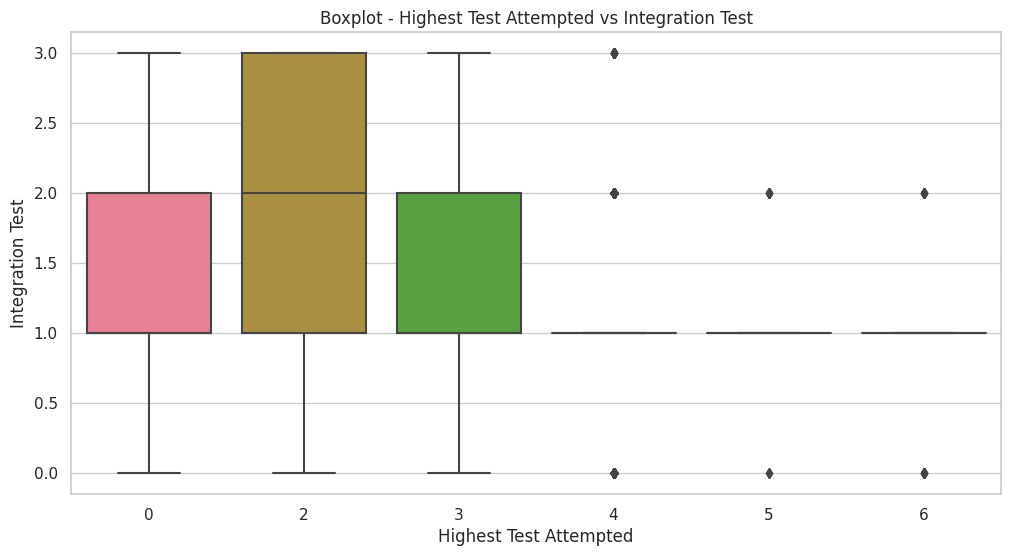

In [95]:
# Visualization 5: Boxplot for 'Highest_Test_Attempted' vs 'Integrationstest'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Highest_Test_Attempted', y='Integrationstest', data=Data, palette='husl')
plt.title('Boxplot - Highest Test Attempted vs Integration Test')
plt.xlabel('Highest Test Attempted')
plt.ylabel('Integration Test')
plt.show()

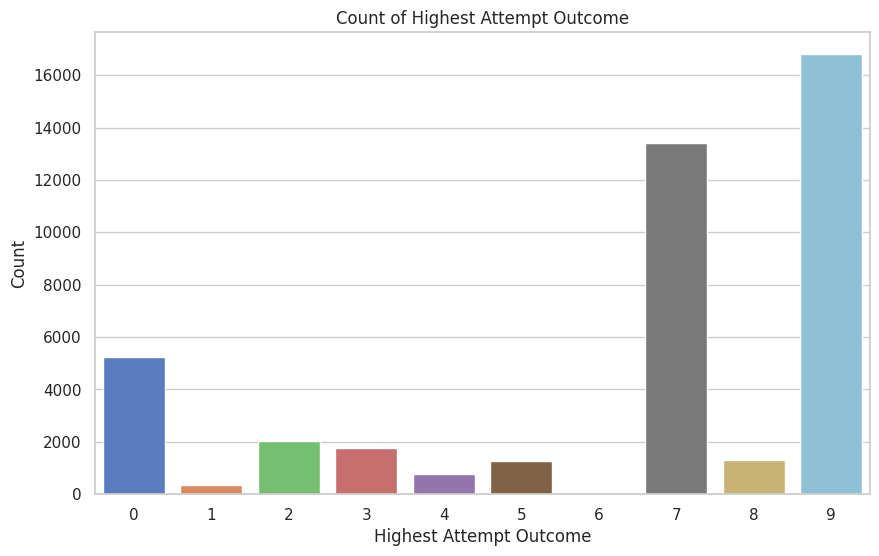

In [96]:
# Visualization 6: Countplot for 'Highest_Attempt_Outcome'
plt.figure(figsize=(10, 6))
sns.countplot(x='Highest_Attempt_Outcome', data=Data, palette='muted')
plt.title('Count of Highest Attempt Outcome')
plt.xlabel('Highest Attempt Outcome')
plt.ylabel('Count')
plt.show()

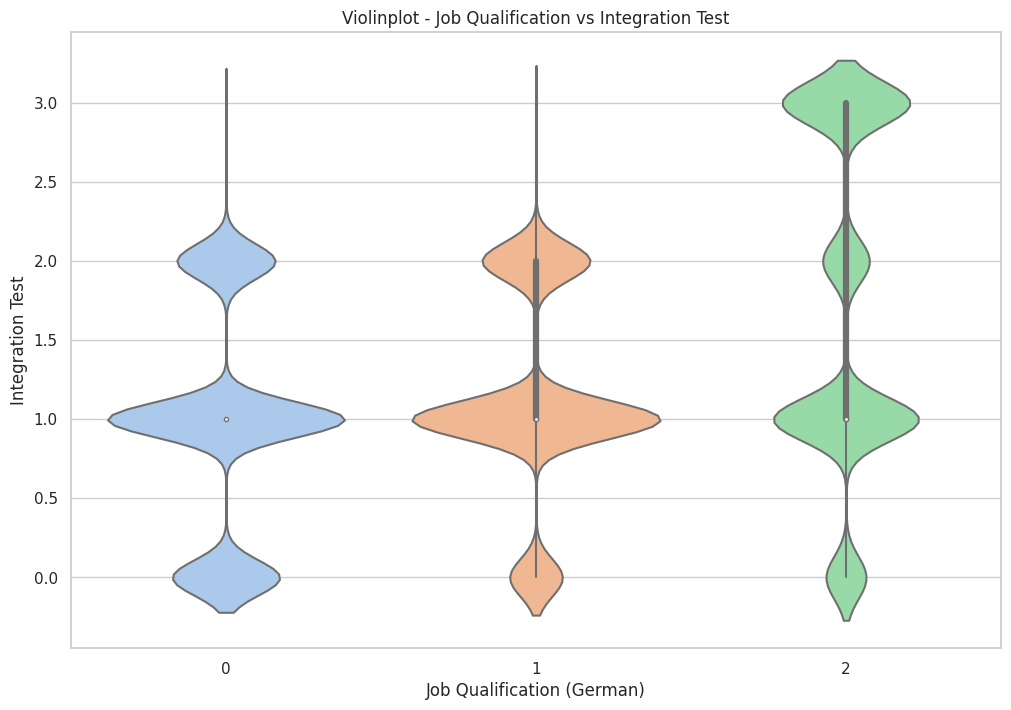

In [97]:
# Visualization 7: Violinplot for 'job_qualification_ger' vs 'Integrationstest'
plt.figure(figsize=(12, 8))
sns.violinplot(x='job_qualification_ger', y='Integrationstest', data=Data, palette='pastel')
plt.title('Violinplot - Job Qualification vs Integration Test')
plt.xlabel('Job Qualification (German)')
plt.ylabel('Integration Test')
plt.show()

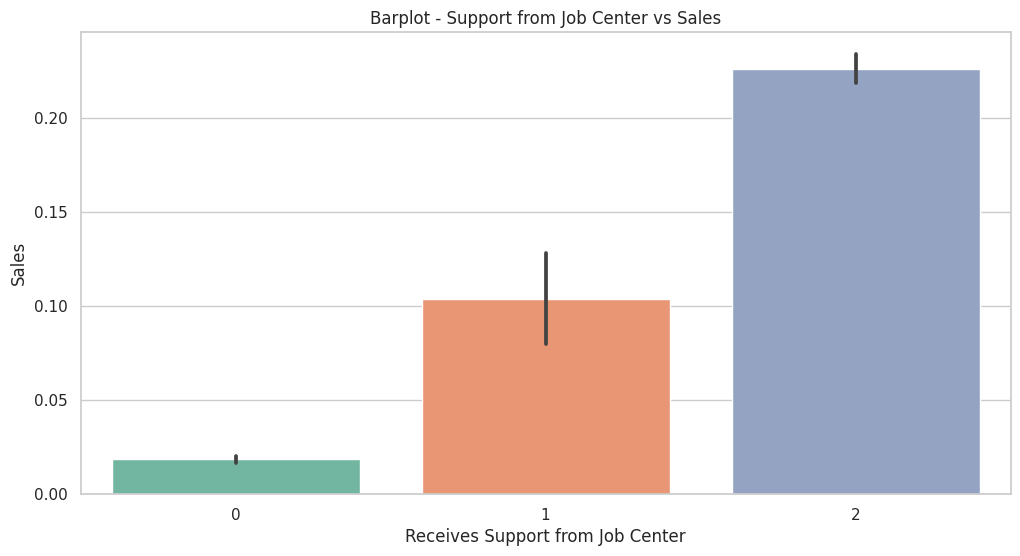

In [98]:

# Visualization 8: Barplot for 'receives_support_from_job_center' and 'sales'
plt.figure(figsize=(12, 6))
sns.barplot(x='receives_support_from_job_center', y='sales', data=Data, palette='Set2')
plt.title('Barplot - Support from Job Center vs Sales')
plt.xlabel('Receives Support from Job Center')
plt.ylabel('Sales')
plt.show()


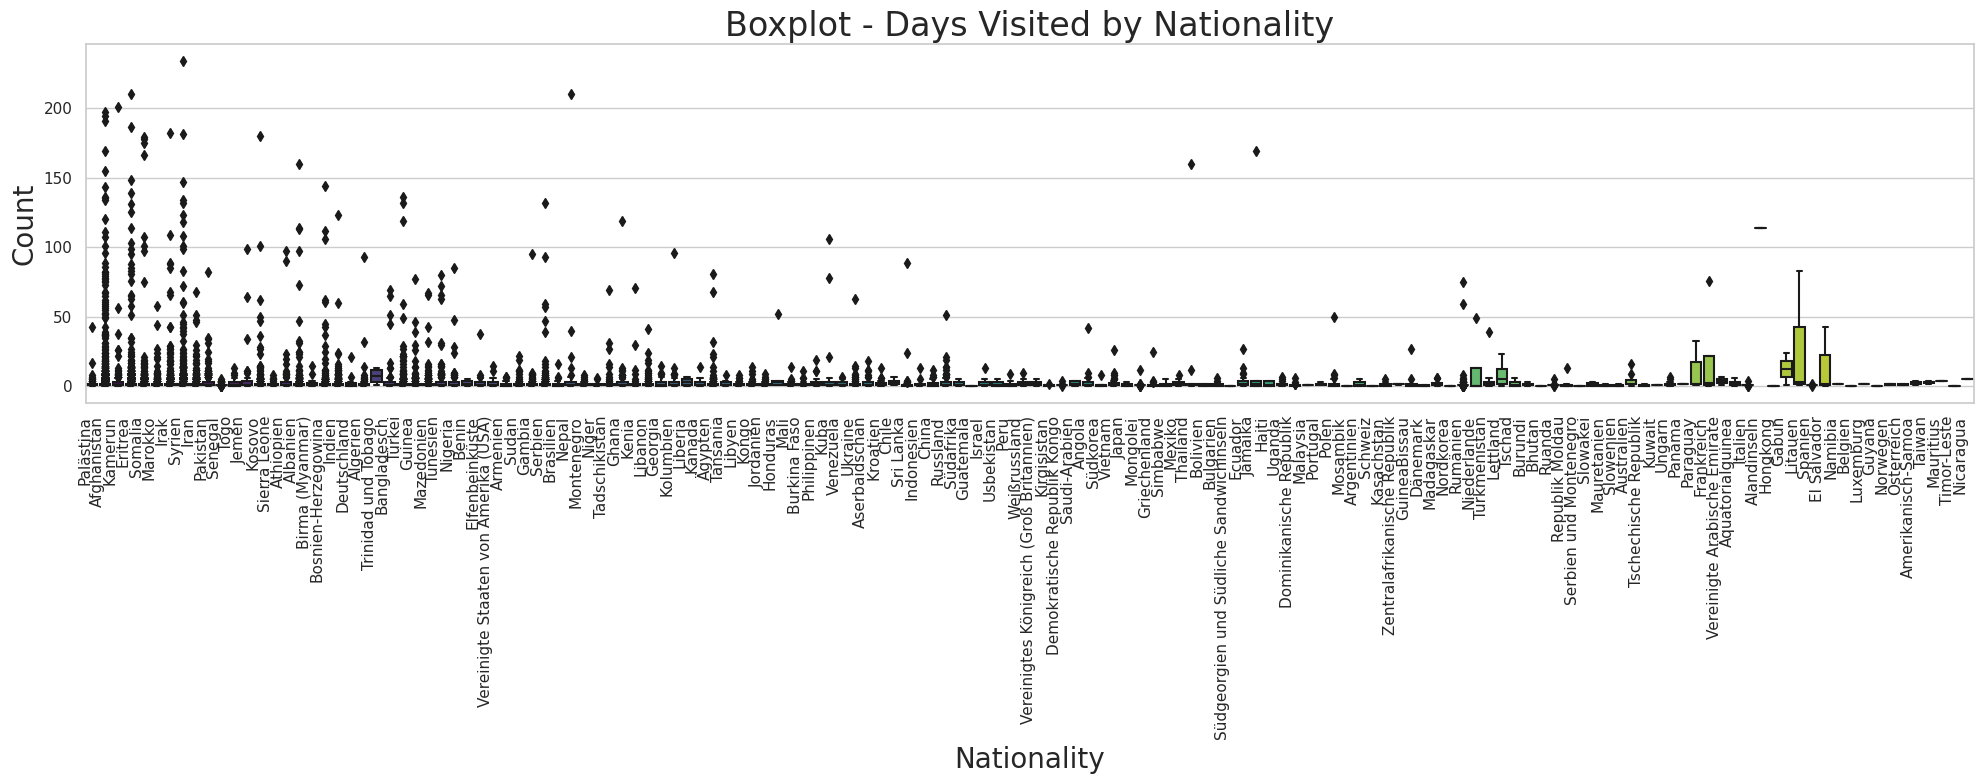

In [99]:
# Visualization 3: Countplot for 'Nationalit_t' with actual country names
# plt.figure(figsize=(14, 8))  # Increase the figure size for better visibility
temp_Data=pd.DataFrame()
# Replace encoded labels with actual country names
Data['Nationality'] = Data['Nationalit_t'].replace(class_mapping_Nationality.values(), class_mapping_Nationality.keys())
temp_Data = Data[Data['Nationality'] != 'Unknown']

# Visualization 9: Boxplot for 'Days_Visited' grouped by 'Nationalit_t'
plt.figure(figsize=(20, 8))
boxplot = sns.boxplot(x='Nationality', y='Days_Visited', data=temp_Data, palette='viridis')
plt.title('Boxplot - Days Visited by Nationality', fontsize=24)
plt.xlabel('Nationality', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Rotate x-axis labels for better visibility
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Drop the 'Nationalit_t' column
Data = Data.drop('Nationality', axis=1)


In [100]:
# # Visualization 10: Pairplot for numeric columns
# sns.pairplot(Data.select_dtypes(include=['int64', 'float64']))
# plt.suptitle('Pairplot of Numeric Columns')
# plt.show()

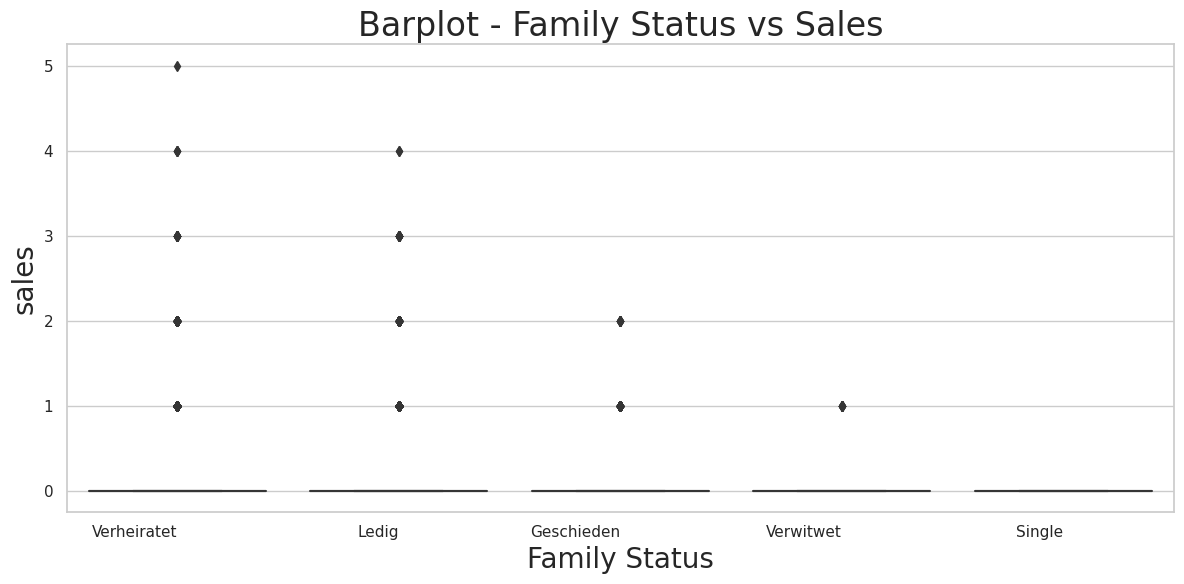

In [101]:
# Visualization 12: Barplot for 'Wie_ist_ihr_aktueller_Familienstand' and 'Rente'
# class_mapping_Family_Status = dict(zip(le.classes_, label_encoder.transform(le.classes_)))
temp_Data=pd.DataFrame()

# Replace encoded labels with actual country names
Data['Family_Status'] = Data['Wie_ist_ihr_aktueller_Familienstand'].replace(class_mapping_Family_Status.values(), class_mapping_Family_Status.keys())
temp_Data = Data[Data['Family_Status'] != 'Not specified']

# Visualization 9: Boxplot for 'Days_Visited' grouped by 'Nationalit_t'
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x='Family_Status', y='sales', data=temp_Data, palette='viridis')
plt.title('Barplot - Family Status vs Sales', fontsize=24)
plt.xlabel('Family Status', fontsize=20)
plt.ylabel('sales', fontsize=20)

# Rotate x-axis labels for better visibility
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=0, ha='right')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Drop the 'Nationalit_t' column
Data = Data.drop('Family_Status', axis=1)


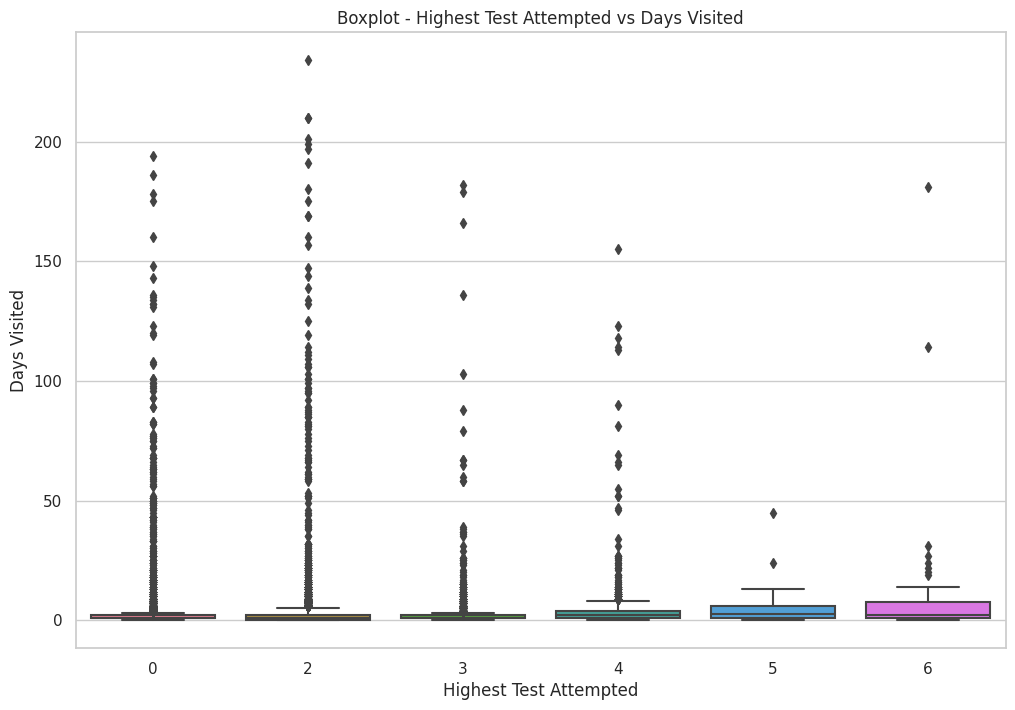

In [102]:
# Visualization 13: Boxplot for 'Highest_Test_Attempted' vs 'Days_Visited'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Highest_Test_Attempted', y='Days_Visited', data=Data, palette='husl')
plt.title('Boxplot - Highest Test Attempted vs Days Visited')
plt.xlabel('Highest Test Attempted')
plt.ylabel('Days Visited')
plt.show()

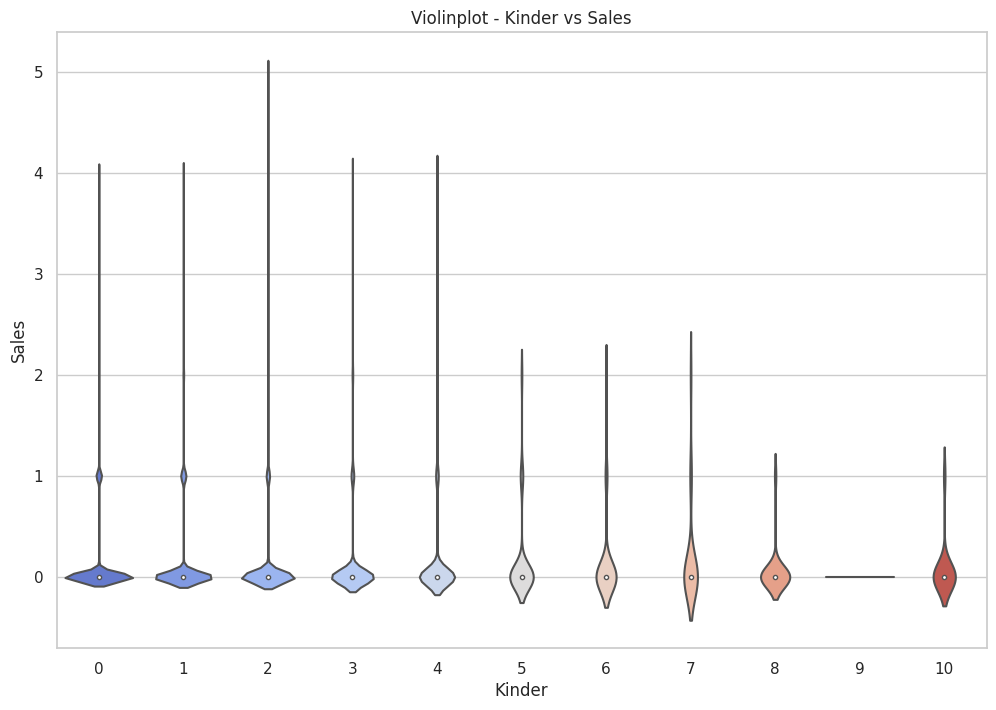

In [103]:
# Visualization 16: Violinplot for 'Kinder' vs 'Rente'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Kinder', y='sales', data=Data, palette='coolwarm')
plt.title('Violinplot - Kinder vs Sales')
plt.xlabel('Kinder')
plt.ylabel('Sales')
plt.show()

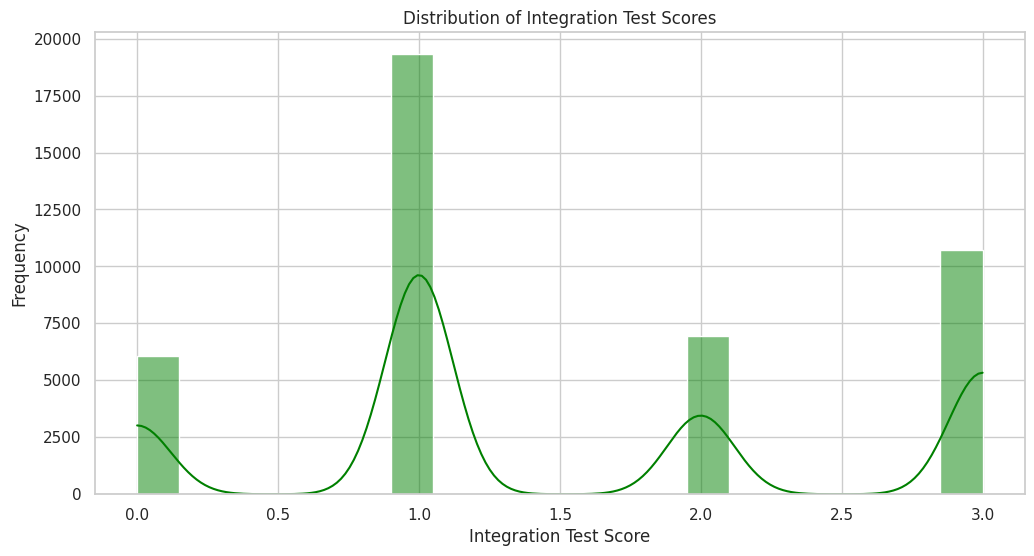

In [104]:
# Visualization 17: Distribution of 'Integrationstest'
plt.figure(figsize=(12, 6))
sns.histplot(Data['Integrationstest'], bins=20, kde=True, color='green')
plt.title('Distribution of Integration Test Scores')
plt.xlabel('Integration Test Score')
plt.ylabel('Frequency')
plt.show()

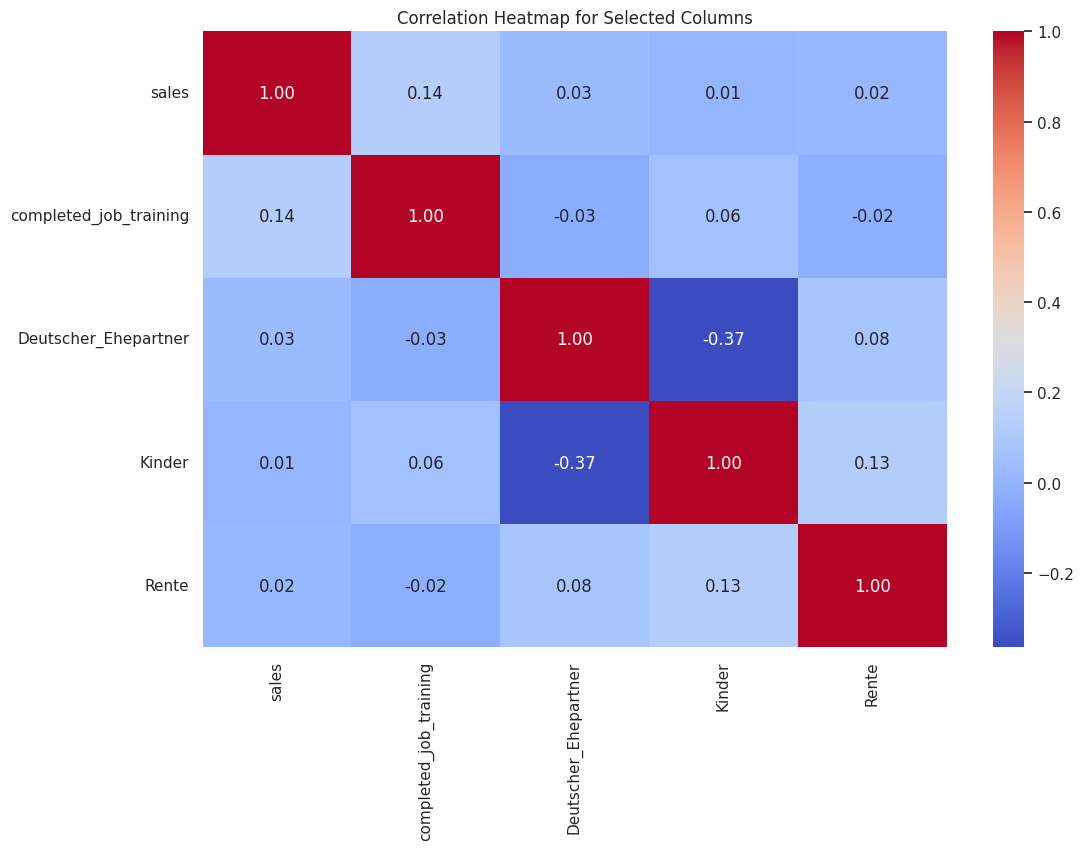

In [105]:


# Visualization 18: Heatmap for selected columns
selected_columns_heatmap = ['sales', 'completed_job_training', 'Deutscher_Ehepartner', 'Kinder', 'Rente']
plt.figure(figsize=(12, 8))
sns.heatmap(Data[selected_columns_heatmap].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Selected Columns')
plt.show()


# Modeling

In [106]:
from sklearn.model_selection import train_test_split

# Assuming 'y' is your target variable and 'X' is your feature matrix
y = Data['sales']
X = Data.drop(columns=['sales'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## RandomForestClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class

# Scale the probabilities to a score between 0 and 100
scaled_score_rf = (y_pred_proba_rf - y_pred_proba_rf.min()) / (y_pred_proba_rf.max() - y_pred_proba_rf.min()) * 100



In [126]:
# Display the scaled scores
print(scaled_score_rf)

[ 0.         10.34482759  0.         ... 19.54022989  0.
  5.20314427]


In [127]:
import numpy as np
from sklearn.model_selection import train_test_split

# Clean the data by dropping NaN values
Visitor_cleaned = Visitor.fillna(0)

# Split the data into 20/80 using random state 42
Visitor_80, Visitor_20 = train_test_split(Visitor_cleaned, test_size=0.2, random_state=42)

# Rescale 'Visitor_Score' values to be between 0 and 100
visitor_20_rescaled = (Visitor_20['Visitor_Score'] - Visitor_20['Visitor_Score'].min()) / (
        Visitor_20['Visitor_Score'].max() - Visitor_20['Visitor_Score'].min()) * 100

# Assume scaled_score_rf is already defined elsewhere in your code
# print("Length of scaled_score_rf:", len(scaled_score_rf))
# print("Length of visitor_20_rescaled:", len(visitor_20_rescaled))

# Make sure that scaled_score_rf has the same length as visitor_20_rescaled
scaled_score_rf = scaled_score_rf[:len(visitor_20_rescaled)]

# Compare results with the 20% of Visitor_Score
correlation_rf_vs_visitor = np.corrcoef(scaled_score_rf, visitor_20_rescaled)[0, 1]
print("\nCorrelation between RandomForest Score and 20% of Visitor_Score:", correlation_rf_vs_visitor)
accuracy_rf = accuracy_score(y_test, y_pred_logreg)
accuracy_rf


Correlation between RandomForest Score and 20% of Visitor_Score: 0.12851943415234737


0.9142259414225942

## LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class

# Calculate accuracy
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Scale the probabilities to a score between 0 and 100
scaled_score_logreg = (y_pred_proba_logreg - y_pred_proba_logreg.min()) / (y_pred_proba_logreg.max() - y_pred_proba_logreg.min()) * 100

# Rescale 'Visitor_Score' values to be between 0 and 100
visitor_20_rescaled = (Visitor_20['Visitor_Score'] - Visitor_20['Visitor_Score'].min()) / (Visitor_20['Visitor_Score'].max() - Visitor_20['Visitor_Score'].min()) * 100

# Compare results with the rescaled 20% of Visitor_Score
correlation_logreg_vs_visitor_rescaled = np.corrcoef(scaled_score_logreg, visitor_20_rescaled)[0, 1]
print("Accuracy for Logistic Regression:", accuracy_logreg)
print("Correlation between Logistic Regression Score and Rescaled 20% of Visitor_Score:", correlation_logreg_vs_visitor_rescaled)


Accuracy for Logistic Regression: 0.9142259414225942
Correlation between Logistic Regression Score and Rescaled 20% of Visitor_Score: 0.2890720689856402


## GradientBoostingClassifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class

# Calculate accuracy
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Scale the probabilities to a score between 0 and 100
scaled_score_gb = (y_pred_proba_gb - y_pred_proba_gb.min()) / (y_pred_proba_gb.max() - y_pred_proba_gb.min()) * 100

# Rescale 'Visitor_Score' values to be between 0 and 100
visitor_20_rescaled_gb = (Visitor_20['Visitor_Score'] - Visitor_20['Visitor_Score'].min()) / (Visitor_20['Visitor_Score'].max() - Visitor_20['Visitor_Score'].min()) * 100

# Compare results with the rescaled 20% of Visitor_Score
correlation_gb_vs_visitor_rescaled = np.corrcoef(scaled_score_gb, visitor_20_rescaled_gb)[0, 1]
print("Accuracy for Gradient Boosting:", accuracy_gb)
print("Correlation between Gradient Boosting Score and Rescaled 20% of Visitor_Score:", correlation_gb_vs_visitor_rescaled)


Accuracy for Gradient Boosting: 0.9173640167364017
Correlation between Gradient Boosting Score and Rescaled 20% of Visitor_Score: 0.14419979173362513


## Support Vector Machine

In [114]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class

# Calculate accuracy
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Scale the probabilities to a score between 0 and 100
scaled_score_svm = (y_pred_proba_svm - y_pred_proba_svm.min()) / (y_pred_proba_svm.max() - y_pred_proba_svm.min()) * 100

# Rescale 'Visitor_Score' values to be between 0 and 100
visitor_20_rescaled_svm = (Visitor_20['Visitor_Score'] - Visitor_20['Visitor_Score'].min()) / (Visitor_20['Visitor_Score'].max() - Visitor_20['Visitor_Score'].min()) * 100

# Compare results with the rescaled 20% of Visitor_Score
correlation_svm_vs_visitor_rescaled = np.corrcoef(scaled_score_svm, visitor_20_rescaled_svm)[0, 1]
print("Accuracy for Support Vector Machine:", accuracy_svm)
print("Correlation between Support Vector Machine Score and Rescaled 20% of Visitor_Score:", correlation_svm_vs_visitor_rescaled)


Accuracy for Support Vector Machine: 0.9156206415620641
Correlation between Support Vector Machine Score and Rescaled 20% of Visitor_Score: 0.23686599753074264


## Applying Advance Technique

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'y' is your target variable and 'X' is your feature matrix
y = Data['sales']
X = Data.drop(columns=['sales'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

# Initialize the StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the StackingClassifier
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Calculate accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print("Accuracy for Stacking Classifier:", accuracy_stacking)


Accuracy for Stacking Classifier: 0.9178289167828917


In [116]:
# Get probabilities for the positive class
y_pred_proba_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Scale the probabilities to a score between 0 and 100
scaled_score_stacking = (y_pred_proba_stacking - y_pred_proba_stacking.min()) / (y_pred_proba_stacking.max() - y_pred_proba_stacking.min()) * 100

# Rescale 'Visitor_Score' values to be between 0 and 100
visitor_20_rescaled_stacking = (Visitor_20['Visitor_Score'] - Visitor_20['Visitor_Score'].min()) / (Visitor_20['Visitor_Score'].max() - Visitor_20['Visitor_Score'].min()) * 100

# Compare results with the rescaled 20% of Visitor_Score
correlation_stacking_vs_visitor_rescaled = np.corrcoef(scaled_score_stacking, visitor_20_rescaled_stacking)[0, 1]

# print("Accuracy for Stacking Classifier:", accuracy_stacking)
print("Correlation between Stacking Classifier Score and Rescaled 20% of Visitor_Score:", correlation_stacking_vs_visitor_rescaled)

Correlation between Stacking Classifier Score and Rescaled 20% of Visitor_Score: 0.1438747380759245


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Assuming 'y' is your target variable and 'X' is your feature matrix
y = Data['sales']
X = Data.drop(columns=['sales'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Filter Methods ---
# SelectKBest with ANOVA F-statistic (f_classif) for classification
selector = SelectKBest(f_classif, k=10)
X_train_filtered = selector.fit_transform(X_train, y_train)
X_test_filtered = selector.transform(X_test)

# --- Wrapper Methods ---
# Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression()
rfe_selector = RFE(model, n_features_to_select=10)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# --- Embedded Methods ---
# LASSO (L1 regularization) for feature selection
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Select features with non-zero coefficients
sfm_selector = SelectFromModel(lasso_model, prefit=True)
X_train_lasso = sfm_selector.transform(X_train)
X_test_lasso = sfm_selector.transform(X_test)

# --- Example of Tree-Based Models (Embedded Method) ---
# RandomForestClassifier for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Select features based on feature importance
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
selected_features_rf = X_train.columns[indices[:10]]
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

# Print the selected features
print("Selected Features (Filter Method):", X_train.columns[selector.get_support()])
print("Selected Features (RFE):", X_train.columns[rfe_selector.support_])
print("Selected Features (LASSO):", X_train.columns[sfm_selector.get_support()])
print("Selected Features (Random Forest):", selected_features_rf)


Selected Features (Filter Method): Index(['receives_support_from_job_center', 'Average_Time_Spent_Minutes',
       'Nationalit_t', 'completed_job_training', 'availability',
       'Arbeitsvertrag', 'residence_permit', 'Days_Visited', 'Vorstrafe',
       'Highest_Attempt_Outcome'],
      dtype='object')
Selected Features (RFE): Index(['receives_support_from_job_center', 'job_qualification_ger',
       'Deutscher_Ehepartner', 'availability',
       'valid_national_passport_(country_of_origin)',
       'receives_support_from_job_center_check',
       'application_permanent_right_of_residence',
       'requirements_fulfilled_for', 'Vorstrafe', 'Highest_Test_Attempted'],
      dtype='object')
Selected Features (LASSO): Index(['Einreisejahr', 'receives_support_from_job_center',
       'job_qualification_ger', 'Average_Time_Spent_Minutes', 'Nationalit_t',
       'completed_job_training', 'Deutscher_Ehepartner', 'Kinder', 'Rente',
       'availability', 'phone_problems_with_immigration_authori

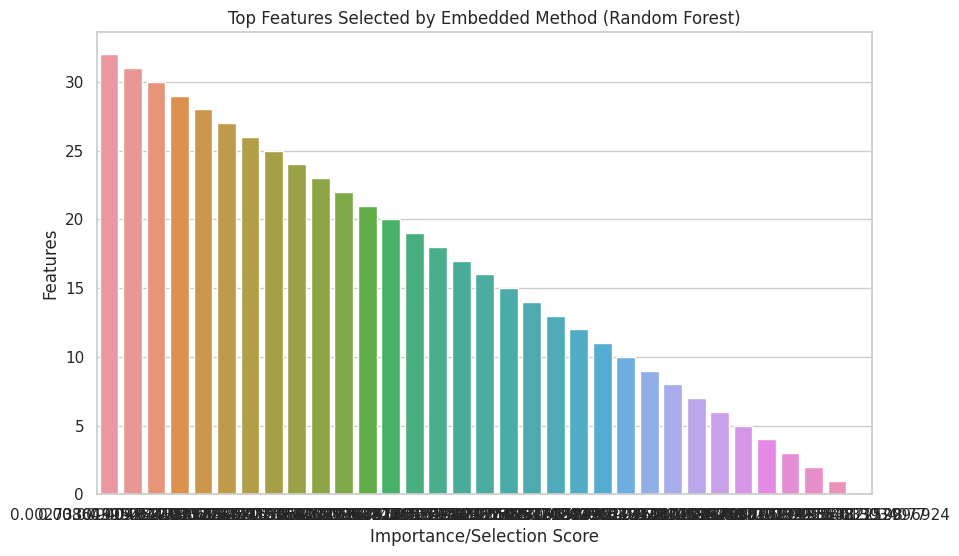

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create bar plots for feature selection
def plot_feature_selection(features, method_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=list(range(len(features))))
    plt.title(f"Top Features Selected by {method_name}")
    plt.xlabel("Importance/Selection Score")
    plt.ylabel("Features")
    plt.show()

# --- Visualize Filter Method (SelectKBest) ---
# plot_feature_selection(selector.scores_, "Filter Method (SelectKBest)")

# # --- Visualize Wrapper Method (RFE) ---
# plot_feature_selection(rfe_selector.ranking_, "Wrapper Method (RFE)")

# # --- Visualize Embedded Method (LASSO) ---
# plot_feature_selection(np.abs(lasso_model.coef_[0]), "Embedded Method (LASSO)")

# # --- Visualize Embedded Method (Random Forest) ---
# plot_feature_selection(feature_importances[indices], "Embedded Method (Random Forest)")


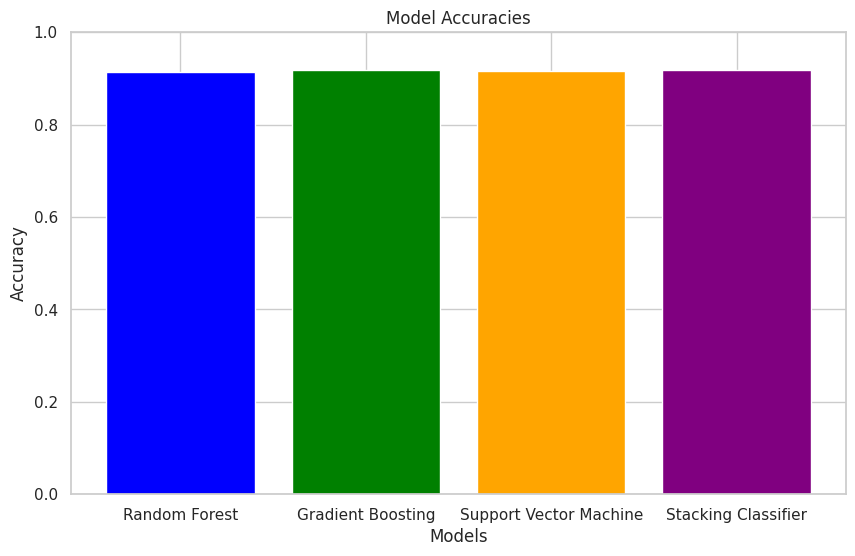

In [128]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Stacking Classifier']

# Model accuracies
accuracies = [accuracy_rf, accuracy_gb, accuracy_svm, accuracy_stacking]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


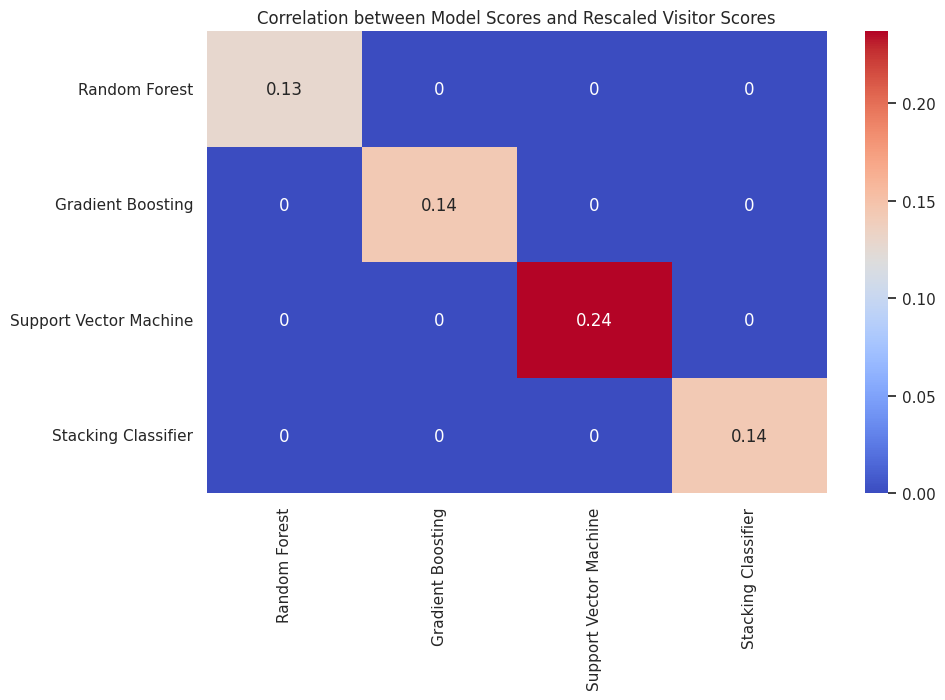

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = np.array([
    [correlation_rf_vs_visitor, 0, 0, 0],
    [0, correlation_gb_vs_visitor_rescaled, 0, 0],
    [0, 0, correlation_svm_vs_visitor_rescaled, 0],
    [0, 0, 0, correlation_stacking_vs_visitor_rescaled]
])

# Model names
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Stacking Classifier']

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=models, yticklabels=models)
plt.title('Correlation between Model Scores and Rescaled Visitor Scores')
plt.show()


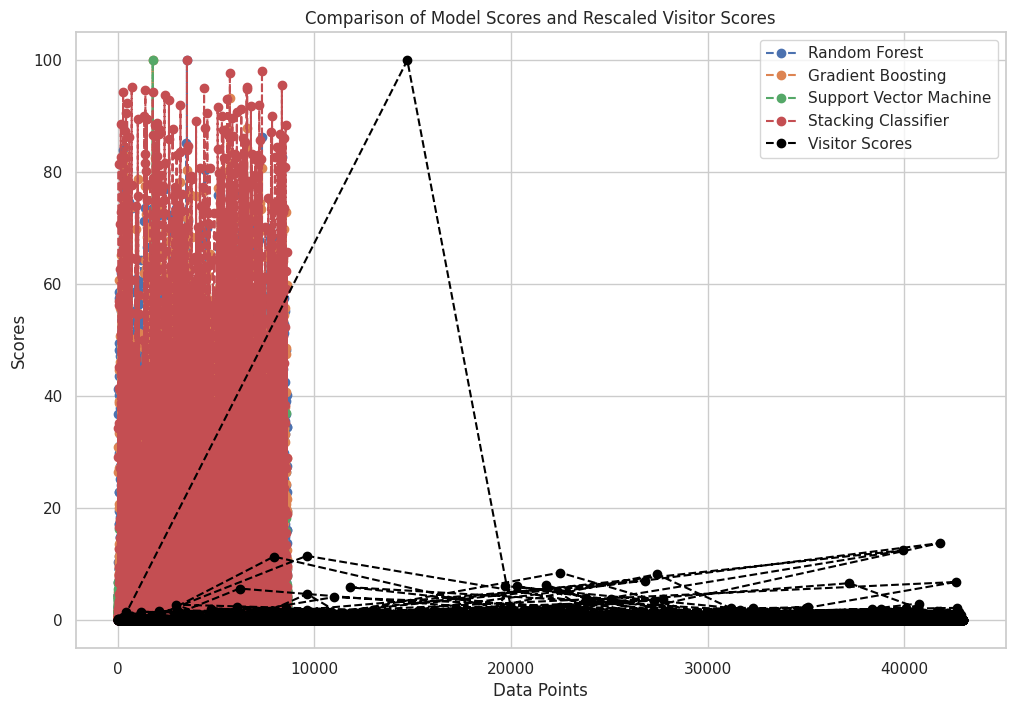

In [133]:
plt.figure(figsize=(12, 8))

# Plot scaled scores
plt.plot(scaled_score_rf, label='Random Forest', linestyle='--', marker='o')
plt.plot(scaled_score_gb, label='Gradient Boosting', linestyle='--', marker='o')
plt.plot(scaled_score_svm, label='Support Vector Machine', linestyle='--', marker='o')
plt.plot(scaled_score_stacking, label='Stacking Classifier', linestyle='--', marker='o')

# Plot rescaled Visitor Scores
plt.plot(visitor_20_rescaled, label='Visitor Scores', linestyle='--', marker='o', color='black')

plt.title('Comparison of Model Scores and Rescaled Visitor Scores')
plt.xlabel('Data Points')
plt.ylabel('Scores')
plt.legend()
plt.show()


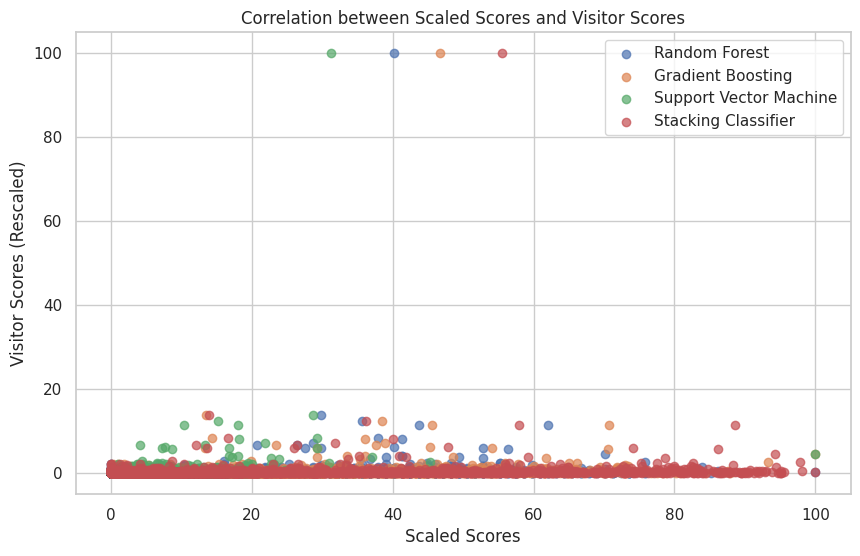

In [134]:
import matplotlib.pyplot as plt

# Scatter plot for correlation between Scaled Scores and Visitor Scores
plt.figure(figsize=(10, 6))
plt.scatter(scaled_score_rf, visitor_20_rescaled, label='Random Forest', alpha=0.7)
plt.scatter(scaled_score_gb, visitor_20_rescaled_gb, label='Gradient Boosting', alpha=0.7)
plt.scatter(scaled_score_svm, visitor_20_rescaled_svm, label='Support Vector Machine', alpha=0.7)
plt.scatter(scaled_score_stacking, visitor_20_rescaled_stacking, label='Stacking Classifier', alpha=0.7)

plt.title('Correlation between Scaled Scores and Visitor Scores')
plt.xlabel('Scaled Scores')
plt.ylabel('Visitor Scores (Rescaled)')
plt.legend()
plt.show()


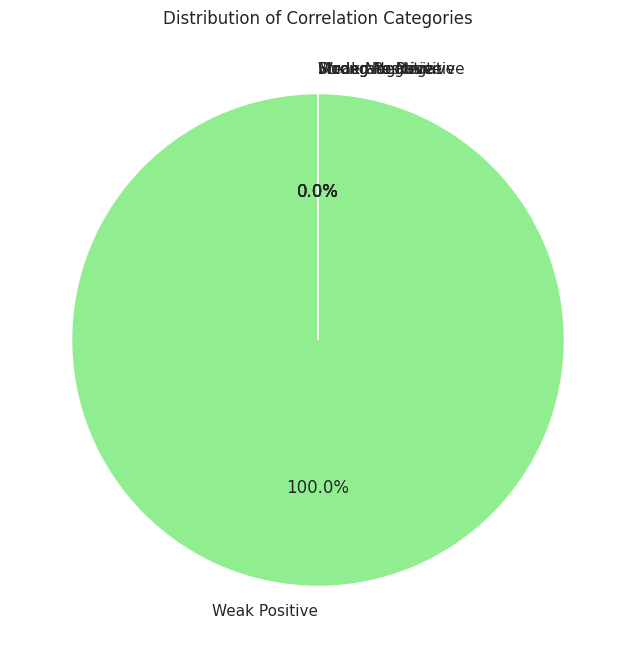

In [136]:
import numpy as np

# Define correlation ranges
correlation_ranges = {
    'Strong Negative': (-1.0, -0.7),
    'Moderate Negative': (-0.7, -0.3),
    'Weak Negative': (-0.3, 0.0),
    'Weak Positive': (0.0, 0.3),
    'Moderate Positive': (0.3, 0.7),
    'Strong Positive': (0.7, 1.0)
}

# Function to categorize correlation values into ranges
def categorize_correlation(correlation):
    for category, (lower, upper) in correlation_ranges.items():
        if lower <= correlation <= upper:
            return category
    return 'Undefined'

# Get correlation values for each model
correlation_rf = np.corrcoef(scaled_score_rf, visitor_20_rescaled)[0, 1]
correlation_gb = np.corrcoef(scaled_score_gb, visitor_20_rescaled_gb)[0, 1]
correlation_svm = np.corrcoef(scaled_score_svm, visitor_20_rescaled_svm)[0, 1]
correlation_stacking = np.corrcoef(scaled_score_stacking, visitor_20_rescaled_stacking)[0, 1]

# Categorize correlation values
categories = [
    categorize_correlation(correlation_rf),
    categorize_correlation(correlation_gb),
    categorize_correlation(correlation_svm),
    categorize_correlation(correlation_stacking)
]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([categories.count(category) for category in correlation_ranges.keys()], labels=correlation_ranges.keys(), autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen'])
plt.title('Distribution of Correlation Categories')
plt.show()

